# Projeto 1 — Classificação de Cancro do Pulmão com recurso a Tomografia Computorizada (CT)

Trabalho elaborado por: 
- Daniel Rodrigues up202306411, 
- Inês Castro up202304060, 
- Leonor Carvalho up202306674  
- Soraia Costa up202305078.

# Índice

1. [Introdução](#Introdução)
2. [Compreensão do problema](#Compreensão-do-problema)
3. [Compreensão e análise dos dados](#Compreensão-e-análise-dos-dados)
    - [3.1 Análise de Ficheiros](#Análise-de-Ficheiros)
    - [3.2 Limpeza do Ficheiro](#Limpeza-do-Ficheiro)
4. [Pré-processamento e preparação dos dados](#Pré-processamento-e-preparação-dos-dados)
5. [Seleção das colunas](#Seleção-das-colunas)
6. [Avaliação](#Avaliação)
7. [Implementação prática](#Implementação-prática)
8. [Conclusão](#Conclusão)
9. [Referências](#Referências)

### **Introdução**

O presente trabalho foi desenvolvido no âmbito da unidade curricular Laboratório de Inteligência Artificial e Ciência de Dados (Lab IA & DC) e tem como objetivo aplicar metodologias de Inteligência Artificial (IA) e Ciência de Dados (CD) na área da saúde, com foco no diagnóstico assistido por computador. O principal objetivo deste projeto é desenvolver um sistema robusto para prever a malignidade de nódulos pulmonares, contribuindo para o diagnóstico precoce do cancro do pulmão e melhorando a qualidade do diagonóstico. 


Para orientar o desenvolvimento do projeto, foi adotada a metodologia CRISP-DM (Cross-Industry Standard Process for Data Mining), uma abordagem estruturada e iterativa amplamente utilizada em projetos de ciência de dados. Esta metodologia define seis fases principais — compreensão do problema, compreensão dos dados, preparação dos dados, modelação, avaliação e implementação — que permitem conduzir o processo de forma sistemática, desde a definição do problema até à avaliação dos resultados e sua aplicação prática.

### **Compreensão do problema**

O cancro continua a representar uma das principais causas de morbilidade e mortalidade a nível mundial, com impacto crescente nas próximas décadas devido ao envelhecimento populacional e ao aumento demográfico. Até 2050, espera-se que ocorram 35,3 milhões de casos de cancro em todo o mundo, o que representa um aumento de 76,6% em relação à estimativa de 20 milhões em 2022. **[1]** Entre os vários tipos de cancro, o cancro do pulmão destaca-se como um dos mais prevalentes e letais, refletindo ainda fortemente os efeitos do tabagismo e da exposição a fatores ambientais. Prevê-se que os casos globais de cancro do pulmão aumentem 86,2%, passando de 2,48 milhões em 2022 para 4,62 milhões em 2050, e que as mortes possam aumentar 95%, atingindo 3,55 milhões, assumindo que as taxas se mantenham estáveis.**[2]** Estes números evidenciam a necessidade urgente de reforçar estratégias de prevenção, rastreio precoce e investigação contínua para reduzir o fardo global da doença.


O diagnóstico precoce do cancro do pulmão tem um papel determinante na sobrevivência dos pacientes. Estudos demonstram que indivíduos diagnosticados em estádio I apresentam uma taxa de sobrevivência a cinco anos de aproximadamente 84%, enquanto nos casos identificados em fases mais avançadas essa taxa pode cair para menos de 10% **[3]** **[4]**. Este contraste acentuado reforça a importância de desenvolver sistemas que permitam detetar e caracterizar precocemente os nódulos pulmonares, antes de a doença atingir estádios irreversíveis.


A tomografia computorizada (CT) é uma técnica de imagem médica não invasiva amplamente utilizada no diagnóstico e acompanhamento do cancro do pulmão. Através da aquisição de imagens tridimensionais detalhadas do tórax, a CT permite observar a morfologia e a densidade dos tecidos, fornecendo informações cruciais sobre a presença, localização e características dos nódulos pulmonares. No entanto, a interpretação dessas imagens depende frequentemente da experiência do radiologista e pode estar sujeita a variabilidade interobservador. Além disso, o volume crescente de dados radiológicos provenientes de exames clínicos torna o processo de avaliação manual moroso e suscetível a erros. Neste contexto, a utilização de sistemas automáticos baseados em inteligência artificial e ciência de dados surge como uma abordagem promissora para melhorar a precisão, a rapidez e a reprodutibilidade do diagnóstico.


É neste cenário que se insere o campo emergente dos Radiomics **[5]**, uma área da ciência de dados que se dedica à extração de características quantitativas (features) de imagens médicas, transformando informação visual em dados mensuráveis. Através de técnicas computacionais avançadas, os Radiomics permitem quantificar padrões de textura, forma, intensidade e heterogeneidade tumoral que muitas vezes não são percetíveis ao olho humano. Estes dados podem ser utilizados para treinar modelos de aprendizagem automática (machine learning) capazes de distinguir entre lesões benignas e malignas, prever a resposta ao tratamento e até estimar o prognóstico clínico. Entre estes modelos, destacam-se as redes neuronais convolucionais (CNNs) **[6]**, amplamente utilizadas em processamento de imagem devido à sua capacidade de detetar automaticamente padrões complexos e características relevantes diretamente a partir das imagens médicas, sem necessidade de extração manual. Assim, a integração dos Radiomics e das CNNs em imagens de CT representa um passo importante para o desenvolvimento de ferramentas de diagnóstico precoce e personalizadas, contribuindo para uma medicina mais precisa, objetiva e orientada por dados.


O objetivo deste projeto é desenvolver uma solução baseada em dados para a classificação do cancro do pulmão utilizando imagens de TC do conjunto de dados LIDC-IDRI. Através da aplicação de técnicas de radiómica, aprendizagem automática (machine learning) e ciência de dados, pretende-se extrair características relevantes das imagens e construir modelos preditivos capazes de distinguir entre nódulos pulmonares benignos e malignos.

### **Compreensão e análise dos dados**

O conjunto de dados utilizado neste projeto é o Lung Image Database Consortium and Image Database Resource Initiative (LIDC-IDRI) [AMB+15, AMea11], uma coleção pública de tomografias torácicas anotadas, amplamente utilizada em investigação sobre cancro do pulmão. Desenvolvido como parte de uma parceria público-privada iniciada pelo National Cancer Institute (NCI), promovida pela Foundation for the National Institutes of Health (FNIH) e apoiada pela Food and Drug Administration (FDA), o LIDC-IDRI representa um esforço colaborativo entre sete centros académicos e oito empresas de imagiologia médica, com o objetivo de criar um recurso internacional padronizado e acessível pela web para o desenvolvimento e avaliação de sistemas CAD para deteção de cancro do pulmão.

O conjunto de dados contém informações de 1 010 pacientes, incluindo exames de TC no formato DICOM e anotações especializadas de nódulos pulmonares. Cada nódulo foi revisto de forma independente por quatro radiologistas torácicos experientes, através de um processo de anotação em duas fases:

- **Fase de leitura cega**: cada radiologista marcou lesões de forma independente, classificando-as em três categorias — nódulo ≥ 3 mm, nódulo < 3 mm e não-nódulo ≥ 3 mm;


- **Fase de leitura aberta**: cada radiologista reavaliou as suas próprias marcações, comparando-as com as anotações anonimizadas dos outros três especialistas, para formar uma avaliação final.


Esta estratégia de anotação foi concebida para garantir um processo de rotulagem abrangente e diversificado, sem impor consenso forçado, refletindo assim a variabilidade natural entre observadores típica de avaliações clínicas reais.


#### **Análise dos Ficheiros**

Os dados do LIDC-IDRI incluem as imagens dos nódulos ("manifest-1600709154662") com o formato DICOM; as anotações e segmentações feitas pelos 4 radiologistas ("tcia-lidc-xml")no formato XML e ZIP; a quantidade de nódulos de cada paciente ("lidc-idri-nodule-counts-6-23-2015") no formato XLSX; e o diagnóstico dos pacientes ("tcia-diagnosis-data-2012-04-20")no formato XLS.

In [16]:
# ============================================
# IMPORTS & SETUP (clean and organized)
# ============================================

from __future__ import annotations

# --- Standard library ---
import logging
import math
import os
import warnings
import xml.etree.ElementTree as ET
from collections import Counter
from pathlib import Path
from statistics import mean, median
from typing import Iterable, List, Optional, Sequence, Tuple

# --- Core scientific stack ---
import joblib
import numpy as np
import pandas as pd
from tqdm import tqdm

# --- Visualization ---
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import measure

# --- Medical imaging / radiomics ---
import pydicom
import pylidc as pl
import radiomics
import SimpleITK as sitk
from radiomics import featureextractor
from scipy.ndimage import binary_dilation

# --- Deep learning ---
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as T

# --- Machine learning: model selection ---
from sklearn.experimental import enable_halving_search_cv  # noqa: F401
from sklearn.model_selection import (
    GroupShuffleSplit,
    HalvingGridSearchCV,
    StratifiedGroupKFold,
)

# --- Machine learning: preprocessing & pipeline ---
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler

# --- Machine learning: feature selection & dimensionality reduction ---
from sklearn.decomposition import PCA
from sklearn.feature_selection import (
    SelectFromModel,
    SelectKBest,
    VarianceThreshold,
    f_classif,
)

# --- Machine learning: classifiers ---
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# --- Machine learning: metrics & evaluation ---
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    accuracy_score,
    balanced_accuracy_score,
    f1_score,
    recall_score,
    roc_auc_score,
)

# --- Warnings & logging hygiene ---
warnings.filterwarnings("ignore", category=FutureWarning)
radiomics.setVerbosity(logging.ERROR)
logging.getLogger("radiomics").setLevel(logging.ERROR)

# ============================================
# ENVIRONMENT INFO (for reproducibility)
# ============================================
import sys
import platform

print("============================================")
print("📦 Environment & Library Versions")
print("============================================")
print(f"Python version:     {sys.version.split()[0]}  ({platform.system()} {platform.release()})")
print(f"NumPy:              {np.__version__}")
print(f"Pandas:             {pd.__version__}")
print(f"Matplotlib:         {plt.matplotlib.__version__}")
print(f"Seaborn:            {sns.__version__}")
print(f"Scikit-learn:       {joblib.__version__}")  # joblib used as sklearn dependency version marker
print(f"PyTorch:            {torch.__version__}")
print(f"Pylidc:             {pl.__version__}")
print(f"PyRadiomics:        {radiomics.__version__}")
print(f"SimpleITK:          {sitk.Version_VersionString()}")
print(f"XGBoost:            {XGBClassifier().__class__.__module__.split('.')[0]}")
print("============================================\n")


📦 Environment & Library Versions
Python version:     3.9.23  (Linux 6.5.0-44-generic)
NumPy:              1.23.5
Pandas:             2.3.2
Matplotlib:         3.4.3
Seaborn:            0.13.2
Scikit-learn:       1.5.2
PyTorch:            2.8.0+cu128
Pylidc:             0.2.3
PyRadiomics:        v3.1.0
SimpleITK:          2.5.2
XGBoost:            xgboost



**Ficheiro  "lidc-idri-nodule-counts-6-23-2015"**

In [ ]:

base_path = Path.cwd()
dataset_path = base_path / "dataset"
excel_file = dataset_path / "lidc-idri-nodule-counts-6-23-2015.xlsx"

# Leitura do ficheiro Excel
nodule_counts = pd.read_excel(excel_file)

# Mostrar estrutura e primeiras linhas
print("Dimensão do dataset:", nodule_counts.shape)
nodule_counts.head()


In [116]:
# Mostrar tipos de dados
print("Tipos de dados por coluna:")

# Resumo mais descritivo
summary = pd.DataFrame({
    "Coluna": nodule_counts.columns,
    "Tipo de Dado": nodule_counts.dtypes.astype(str)
})
summary

Tipos de dados por coluna:


,Coluna,Tipo de Dado
TCIA Patent ID,TCIA Patent ID,object
Total Number of Nodules*,Total Number of Nodules*,int64
Number of Nodules >=3mm**,Number of Nodules >=3mm**,int64
Number of Nodules <3mm***,Number of Nodules <3mm***,int64
Unnamed: 4,Unnamed: 4,float64
Unnamed: 5,Unnamed: 5,object


In [117]:
# Verificar valores ausentes
nan_counts = nodule_counts.isna().sum()
nan_percentage = (nan_counts / len(nodule_counts)) * 100

# Combinar num DataFrame para melhor leitura
nan_summary = pd.DataFrame({
    "Valores NaN": nan_counts,
    "Percentagem (%)": nan_percentage.round(2)
})

print("Análise de valores ausentes:")
nan_summary

Análise de valores ausentes:


,Valores NaN,Percentagem (%)
TCIA Patent ID,1,0.10
Total Number of Nodules*,0,0.00
Number of Nodules >=3mm**,0,0.00
Number of Nodules <3mm***,0,0.00
Unnamed: 4,1019,100.00
Unnamed: 5,1016,99.71


O ficheiro apresenta 6 colunas e 1019 linhas.
Relativamente às colunas temos: "TCIA Patent ID" (object), com o ID de cada paciente no formato "LIDC-IDRI-----"; "Total Number of Nodules"(int64), com o número de nódulos classificados como nódulo <=3mm ou nódulo >=3mm por pelo menos um dos radiologistas; "Number of Nodules >=3mm"(int64), com o número de nódulos classificados como nódulo >=3mm por pelo menos um dos radiologistas; "Number of Nodules <=3mm"(int64), com o número de nódulos classificados como nódulo <=3mm por pelo menos um dos radiologistas (sem nenhuma classificação nódulo >=3mm); "Unnamed: 4"(float64), que é uma coluna vazia; "Unnamed: 5"(object), que só apresenta três entradas não vazias, nas quais se explicam os critérios utilizados para a contagem efetuada nas colunas anteriores. Na coluna "TCIA Patent ID" há um única NaN, que corresponde à linha final em que se apresenta o total dos nódulos. 
O ficheiro apresenta 1019 linhas (1 com o total nódulos de cada coluna+ 1018 IDs) embora na elaboração do LIDC-IDRI só tenham sido analisados 1010 pacientes. O que pode ter acontecido foi: há pacientes que foram analisados mais que uma vez e portanto há mais do que um ficheiro "LIDC-IDRI-----" a corresponder ao mesmo paciente.


### **Limpeza do ficheiro:**

Visto que as colunas Unnamed e a última linha do ficheiro não apresentam dados dos pacientes, serão removidas.

In [118]:
# Remover colunas desnecessárias (Unnamed: 4 e Unnamed: 5)
nodule_counts = nodule_counts.drop(columns=["Unnamed: 4", "Unnamed: 5"], errors="ignore")

# Remover linhas sem Patient ID 
nodule_counts= nodule_counts.dropna(subset=["TCIA Patent ID"])

print("Linhas:", len(nodule_counts))
print(nodule_counts.head(5))



Linhas: 1018
   TCIA Patent ID  Total Number of Nodules*   Number of Nodules >=3mm**  \
0  LIDC-IDRI-0001                          4                          1   
1  LIDC-IDRI-0002                         12                          1   
2  LIDC-IDRI-0003                          4                          4   
3  LIDC-IDRI-0004                          4                          1   
4  LIDC-IDRI-0005                          9                          3   

   Number of Nodules <3mm***  
0                          3  
1                         11  
2                          0  
3                          3  
4                          6  


### Análise:

Em primeiro lugar, é importante compreender a razão pela qual o ficheiro apresenta 1018 entradas, quando o conjunto de dados LIDC-IDRI documenta apenas 1010 pacientes.
Esta diferença sugere a possibilidade de existirem vários exames de tomografia computadorizada (CT) associados a vários pacientes. “The final LIDC-IDRI database consists of 1018 cases (CT scans) collected from 1010 patients. Each case includes a CT scan and an associated XML file containing the results of the annotation process performed by four experienced thoracic radiologists.”[7]


In [119]:
# Contar quantas vezes cada ID aparece
duplicate_counts = nodule_counts["TCIA Patent ID"].value_counts()

# Selecionar apenas os que aparecem mais de uma vez
duplicate_ids = duplicate_counts[duplicate_counts > 1].index

# Filtrar as linhas correspondentes a esses IDs duplicados
duplicated_rows = nodule_counts[nodule_counts["TCIA Patent ID"].isin(duplicate_ids)]

# Mostrar as 16 linhas (8 pacientes × 2 registos)
print(f"Total de linhas duplicadas encontradas: {len(duplicate_ids)}\n")
print(duplicated_rows)


Total de linhas duplicadas encontradas: 8

     TCIA Patent ID  Total Number of Nodules*   Number of Nodules >=3mm**  \
131  LIDC-IDRI-0132                         14                          6   
132  LIDC-IDRI-0132                         12                          8   
151  LIDC-IDRI-0151                          3                          1   
152  LIDC-IDRI-0151                          7                          1   
315  LIDC-IDRI-0315                         13                          7   
316  LIDC-IDRI-0315                          8                          5   
333  LIDC-IDRI-0332                          6                          5   
334  LIDC-IDRI-0332                          3                          2   
357  LIDC-IDRI-0355                          4                          1   
358  LIDC-IDRI-0355                          3                          2   
368  LIDC-IDRI-0365                          8                          1   
369  LIDC-IDRI-0365              

Como previsto, foram identificados oito pacientes com entradas duplicadas, correspondendo a oito indivíduos que possuem dois estudos de tomografia computadorizada (CT) distintos no conjunto de dados.
A análise destas linhas mostra que o número de nódulos registado para o mesmo paciente difere entre os dois exames, o que confirma a existência de múltiplos estudos clínicos independentes por paciente e não uma simples duplicação de registos.

       Total Number of Nodules*   Number of Nodules >=3mm**  \
count                1018.000000                1018.000000   
mean                    7.240668                   2.621807   
std                     8.353547                   2.665449   
min                     0.000000                   0.000000   
25%                     3.000000                   1.000000   
50%                     5.000000                   2.000000   
75%                     9.000000                   3.000000   
max                   119.000000                  23.000000   

       Number of Nodules <3mm***  
count                1018.000000  
mean                    4.618861  
std                     7.208656  
min                     0.000000  
25%                     1.000000  
50%                     3.000000  
75%                     5.000000  
max                   118.000000  


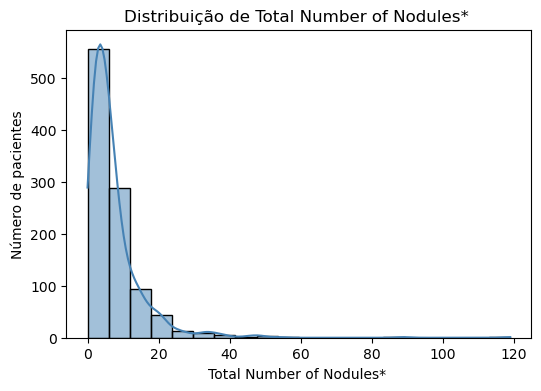

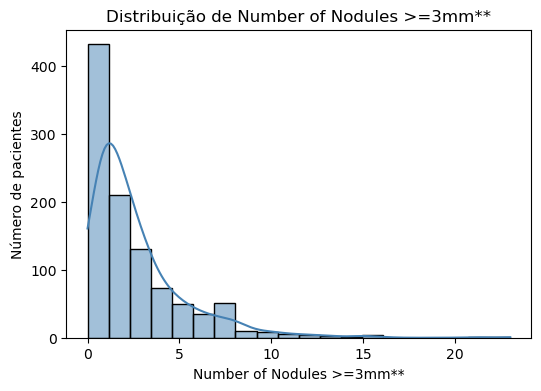

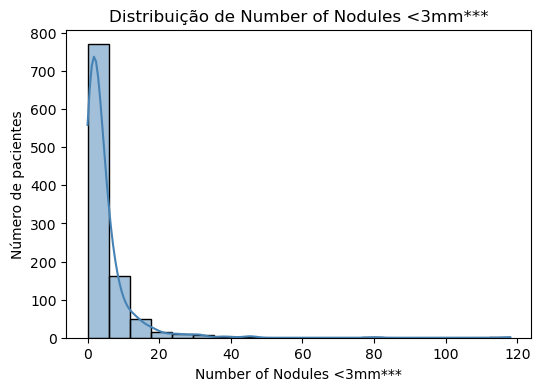

In [120]:
# Estatísticas
print(nodule_counts.describe())

# Distribuição
for col in ["Total Number of Nodules* ", "Number of Nodules >=3mm**", "Number of Nodules <3mm***"]:
    plt.figure(figsize=(6,4))
    sns.histplot(nodule_counts[col], bins=20, kde=True, color="steelblue", edgecolor="black")
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.ylabel("Número de pacientes")
    plt.show()

**Ficheiro "tcia-diagnosis-data-2012-04-20"**

In [121]:
excel_file2 = dataset_path / "tcia-diagnosis-data-2012-04-20.xls"
diagnosis = pd.read_excel(excel_file2)

print("Dimensão do dataset:", diagnosis.shape)
diagnosis.head()


Dimensão do dataset: (157, 14)


,TCIA Patient ID,"Diagnosis at the Patient Level\n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic\n",Diagnosis Method\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response,Primary tumor site for metastatic disease,"Nodule 1\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 1\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 2\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 2\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 3\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 3\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 4\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 4\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 5\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 5\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n
0,LIDC-IDRI-0068,3,4,Head & Neck Cancer,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LIDC-IDRI-0071,3,1,Head & Neck,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LIDC-IDRI-0072,2,4,Lung Cancer,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LIDC-IDRI-0088,3,0,Uterine Cancer,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LIDC-IDRI-0090,2,3,NSCLC,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Este ficheiro tem 157 linhas e 14 colunas. Relativamente às colunas temos: "TCIA Patient ID" com os IDs dos pacientes; "Diagnosis at the Patient", que reflete o diagnóstico dos pacientes através de vários níveis: 0=desconhecido, 1=benígno/não malígno, 2=malígno/ cancro pulmonar primário, 3=metástico malígno; "Diagnosis Method", que retrata o metodo utilizado no diagnóstico: 0=desconhecido, 1=revisão de imagens radiológicas para mostrar 2 anos de nódulo estável, 2=biópsia, 3=ressecção cirúrgica, 4=progressão ou resposta; "Primary tumor site for metastatic disease", que indica o local onde começou o cancro inicial que deu origem às metástases; as restantes colunas são pares de colunas "Diagnosis at the Nodule Level"/ "Diagnosis Method at the Nodule Level" para nódulos numerados, na primeira, faz-se o diagnóstico no nódulo: 0=desconhecido, 1=doença benigna ou não maligna, 2=cancro do pulmão primário maligno, 3=metastático maligno e na segunda, destacamos o método utilizado no diagnóstico: 0=desconhecido, 1=revisão de imagens radiológicas para mostrar 2 anos de nódulo estável, 2=biópsia, 3= ressecção cirúrgica, 4=progressão ou resposta.
Este ficheiro só apresenta 157 entradas embora no LIDC-IDRI se analizem 1010 pacientes.

De modo a tornar este ficheiro mais prático, renomeamos as colunas da seguinte forma:

In [122]:
# Renomear colunas para nomes mais simples e curtos
diagnosis.columns = [
    "Patient Id",
    "Patient_Diagnosis",
    "Diagnosis_Method",
    "Primary_Tumor_Site",
    "Nodule1_Diagnosis",
    "Nodule1_Method",
    "Nodule2_Diagnosis",
    "Nodule2_Method",
    "Nodule3_Diagnosis",
    "Nodule3_Method",
    "Nodule4_Diagnosis",
    "Nodule4_Method",
    "Nodule5_Diagnosis",
    "Nodule5_Method"
]

diagnosis.head()

,Patient Id,Patient_Diagnosis,Diagnosis_Method,Primary_Tumor_Site,Nodule1_Diagnosis,Nodule1_Method,Nodule2_Diagnosis,Nodule2_Method,Nodule3_Diagnosis,Nodule3_Method,Nodule4_Diagnosis,Nodule4_Method,Nodule5_Diagnosis,Nodule5_Method
0,LIDC-IDRI-0068,3,4,Head & Neck Cancer,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LIDC-IDRI-0071,3,1,Head & Neck,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LIDC-IDRI-0072,2,4,Lung Cancer,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LIDC-IDRI-0088,3,0,Uterine Cancer,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LIDC-IDRI-0090,2,3,NSCLC,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Mostrar tipos de dados
print("Tipos de dados por coluna:")

# Resumo mais descritivo
summary = pd.DataFrame({
    "Coluna": diagnosis.columns,
    "Tipo de Dado": diagnosis.dtypes.astype(str)
})
summary

Tipos de dados por coluna:


,Coluna,Tipo de Dado
Patient Id,Patient Id,object
Patient_Diagnosis,Patient_Diagnosis,int64
Diagnosis_Method,Diagnosis_Method,int64
Primary_Tumor_Site,Primary_Tumor_Site,object
Nodule1_Diagnosis,Nodule1_Diagnosis,float64
Nodule1_Method,Nodule1_Method,float64
Nodule2_Diagnosis,Nodule2_Diagnosis,float64
Nodule2_Method,Nodule2_Method,float64
Nodule3_Diagnosis,Nodule3_Diagnosis,object
Nodule3_Method,Nodule3_Method,object


In [124]:
# Verificar valores ausentes
nan_counts = diagnosis.isna().sum()
nan_percentage = (nan_counts / len(diagnosis)) * 100

# Combinar num DataFrame para melhor leitura
nan_summary = pd.DataFrame({
    "Valores NaN": nan_counts,
    "Percentagem (%)": nan_percentage.round(2)
})

print("Análise de valores ausentes:")
nan_summary

Análise de valores ausentes:


,Valores NaN,Percentagem (%)
Patient Id,0,0.00
Patient_Diagnosis,0,0.00
Diagnosis_Method,0,0.00
Primary_Tumor_Site,0,0.00
Nodule1_Diagnosis,20,12.74
Nodule1_Method,20,12.74
Nodule2_Diagnosis,137,87.26
Nodule2_Method,137,87.26
Nodule3_Diagnosis,156,99.36
Nodule3_Method,156,99.36


Dado que há várias features com uma percentagem elevada de NaN, temos de eliminar as colunas com uma percentagem de NaN >50%.

In [ ]:
# Eliminar colunas com mais de 50%de NaN
threshold = 50
diagnosis = diagnosis.loc[:, nan_percentage<threshold]

print("\nColunas mantidas:", diagnosis.columns.tolist())
print("Dimensão final:", diagnosis.shape)



Colunas mantidas: ['Patient Id', 'Patient_Diagnosis', 'Diagnosis_Method', 'Primary_Tumor_Site', 'Nodule1_Diagnosis', 'Nodule1_Method']
Dimensão final: (157, 6)


In [126]:
# Comparar valores entre Patient_Diagnosis e Nodule1_Diagnosis
same = (diagnosis["Patient_Diagnosis"] == diagnosis["Nodule1_Diagnosis"]).sum()
total = len(diagnosis.dropna(subset=["Nodule1_Diagnosis"]))
print(f"Iguais: {same}/{total} ({same/total:.1%})")


Iguais: 123/137 (89.8%)


In [127]:
same_method = (diagnosis["Diagnosis_Method"] == diagnosis["Nodule1_Method"]).sum()
total_method = len(diagnosis.dropna(subset=["Nodule1_Method"]))
print(f"Iguais: {same_method}/{total_method} ({same_method/total_method:.1%})")


Iguais: 116/137 (84.7%)


As colunas Nodule1_Diagnosis e Nodule1_Method representam a informação de diagnóstico e método aplicada especificamente ao primeiro nódulo de cada paciente.
A comparação entre estas colunas e Patient_Diagnosis / Diagnosis_Method revelou uma correspondência quase total, indicando que, na maioria dos casos, o diagnóstico e o método a nível do paciente coincidem com os do primeiro nódulo.
Assim, estas colunas não acrescentam informação nova e podem ser consideradas redundantes para a análise global.

In [128]:
# Excluir colunas relativas ao Nódulo 1
diagnosis = diagnosis.drop(columns=["Nodule1_Diagnosis", "Nodule1_Method"], errors="ignore")
diagnosis.head()


,Patient Id,Patient_Diagnosis,Diagnosis_Method,Primary_Tumor_Site
0,LIDC-IDRI-0068,3,4,Head & Neck Cancer
1,LIDC-IDRI-0071,3,1,Head & Neck
2,LIDC-IDRI-0072,2,4,Lung Cancer
3,LIDC-IDRI-0088,3,0,Uterine Cancer
4,LIDC-IDRI-0090,2,3,NSCLC


C:\Users\Soraia\AppData\Local\Temp\ipykernel_2568\1916286570.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


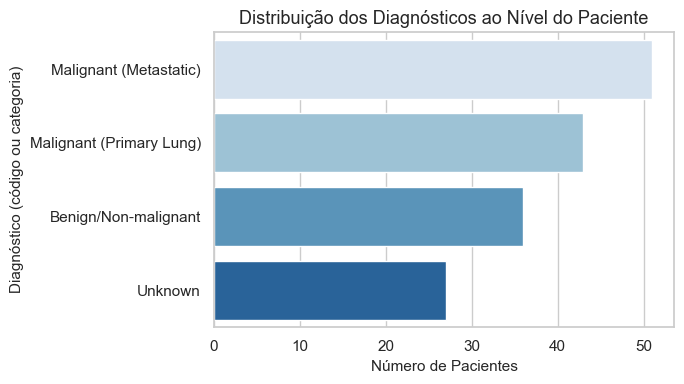

C:\Users\Soraia\AppData\Local\Temp\ipykernel_2568\1916286570.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


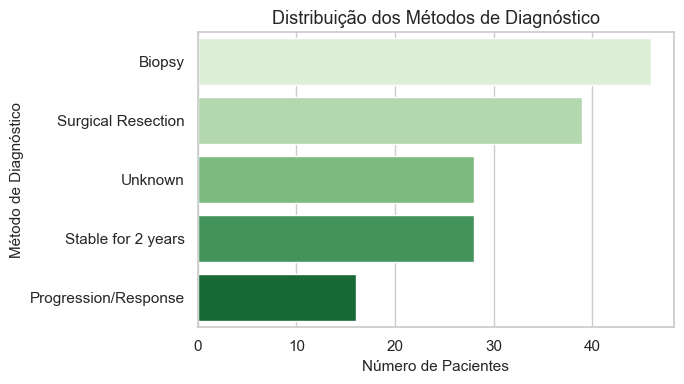

C:\Users\Soraia\AppData\Local\Temp\ipykernel_2568\1916286570.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


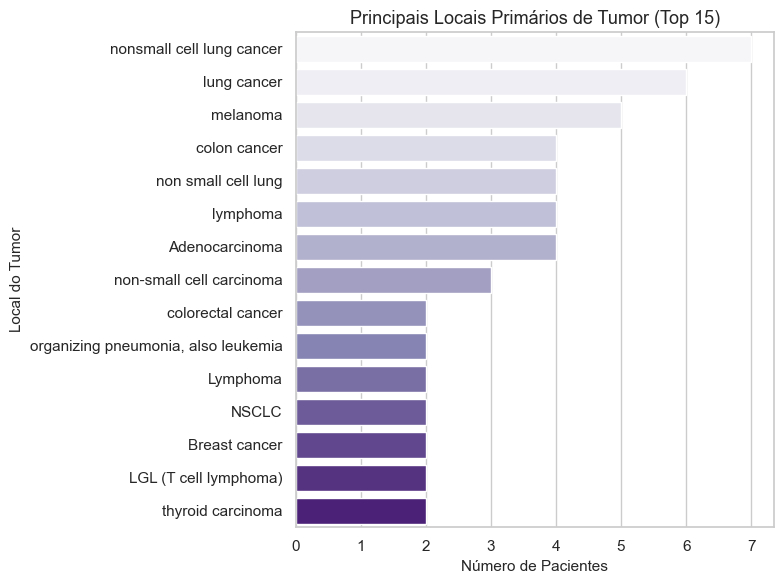

In [149]:


# Configurações visuais globais
sns.set(style="whitegrid", palette="Blues_r")
plt.rcParams["axes.titlesize"] = 13
plt.rcParams["axes.labelsize"] = 11

# ============================
# Distribuição do diagnóstico do paciente
# ============================

plt.figure(figsize=(7,4))
sns.countplot(
    y="Patient_Diagnosis",
    data=diagnosis,
    order=diagnosis["Patient_Diagnosis"].value_counts().index,
    palette="Blues"
)
plt.title("Distribuição dos Diagnósticos ao Nível do Paciente")
plt.xlabel("Número de Pacientes")
plt.ylabel("Diagnóstico (código ou categoria)")
plt.tight_layout()
plt.show()


# ============================
#  Distribuição do método de diagnóstico
# ============================

plt.figure(figsize=(7,4))
sns.countplot(
    y="Diagnosis_Method",
    data=diagnosis,
    order=diagnosis["Diagnosis_Method"].value_counts().index,
    palette="Greens"
)
plt.title("Distribuição dos Métodos de Diagnóstico")
plt.xlabel("Número de Pacientes")
plt.ylabel("Método de Diagnóstico")
plt.tight_layout()
plt.show()


# ============================
#  Distribuição dos locais primários de tumor
# ============================

plt.figure(figsize=(8,6))

# Mostra apenas os 15 principais (caso tenhas muitos tipos)
top_sites = diagnosis["Primary_Tumor_Site"].value_counts().nlargest(15).index

sns.countplot(
    y="Primary_Tumor_Site",
    data=diagnosis[diagnosis["Primary_Tumor_Site"].isin(top_sites)],
    order=top_sites,
    palette="Purples"
)
plt.title("Principais Locais Primários de Tumor (Top 15)")
plt.xlabel("Número de Pacientes")
plt.ylabel("Local do Tumor")
plt.tight_layout()
plt.show()


Através da análise deste ficheiro, concluimos que nesta amostra de 157 pacientes, o diagnóstico mais comum é "Malignant (Metastatic)", o método mais utilizado é "Biopsy" e o local mais comum para o cancro primário é o "nonsmall cell lung cancer".

**Pasta "tcia-lidc-xml"**

In [140]:
xml_root = Path.cwd() / "dataset" / "tcia-lidc-xml"

# validar que existe
assert xml_root.exists(), f"Pasta não encontrada: {xml_root}"

# subpastas diretas (ex.: 157, 185, 186, …)
subdirs = sorted([p for p in xml_root.iterdir() if p.is_dir()])
print(f"Subpastas encontradas: {len(subdirs)}")
subdirs[:10]  # amostra

Subpastas encontradas: 6


[WindowsPath('d:/ProjetoLabAIDS/dataset/tcia-lidc-xml/157'),
 WindowsPath('d:/ProjetoLabAIDS/dataset/tcia-lidc-xml/185'),
 WindowsPath('d:/ProjetoLabAIDS/dataset/tcia-lidc-xml/186'),
 WindowsPath('d:/ProjetoLabAIDS/dataset/tcia-lidc-xml/187'),
 WindowsPath('d:/ProjetoLabAIDS/dataset/tcia-lidc-xml/188'),
 WindowsPath('d:/ProjetoLabAIDS/dataset/tcia-lidc-xml/189')]

In [144]:


def summarize_subdir(d: Path):
    files = [p for p in d.rglob('*') if p.is_file()]
    ext_counts = Counter([p.suffix.lower() or "<no_ext>" for p in files])
    total_files = len(files)
    total_size_mb = sum(p.stat().st_size for p in files) / (1024**2)
    # stringify tipos para leitura rápida
    types_str = "; ".join(f"{ext or '<no_ext>'}: {n}" for ext, n in sorted(ext_counts.items()))
    return {
        "subdir": d.name,
        "total_files": total_files,
        "total_size_mb": round(total_size_mb, 2),
        "types_breakdown": types_str
    }



rows = [summarize_subdir(sd) for sd in subdirs]
summary_df = pd.DataFrame(rows).sort_values(by="subdir").reset_index(drop=True)

summary_df.head(10)



,subdir,total_files,total_size_mb,types_breakdown
0,157,11,1.96,.xml: 11
1,185,232,22.33,.xml: 232
2,186,300,22.96,.xml: 300
3,187,300,41.72,.xml: 300
4,188,300,49.21,.xml: 300
5,189,175,27.90,.xml: 175


A pasta "tcia-lidc-xml" apresenta seis subpastas, cada subpasta é composta por vários ficheiros XML. No total são 1318 ficheiros XML. Cada XML corresponde a um único paciente (estudo CT), contém as anotações feitas pelos radiologistas que participaram na leitura desse exame de tomografia computadorizada (CT) e inclui as respetivas características radiológicas (ex. malignidade, textura, spiculação, etc.). Qual será a razão para existirem mais 300 ficheiros XML do que estudos CT(1018 estudos)? Serão duplicados?

In [147]:

xml_root = Path.cwd() / "dataset" / "tcia-lidc-xml"
files = sorted([p for p in xml_root.rglob("*.xml")])

NS = {"lidc": "http://www.nih.gov"}

def get_text(e, path):
    n = e.find(path, NS)
    return n.text.strip() if (n is not None and n.text) else None

rows = []
for f in files:
    try:
        root = ET.parse(f).getroot()
        series_uid = get_text(root, ".//lidc:ResponseHeader/lidc:SeriesInstanceUID")
        study_uid  = get_text(root, ".//lidc:ResponseHeader/lidc:StudyInstanceUID")  # se existir
        rows.append({
            "file_rel": str(f.relative_to(xml_root)),
            "SeriesInstanceUID": series_uid,
            "StudyInstanceUID": study_uid
        })
    except Exception as e:
        rows.append({"file_rel": str(f.relative_to(xml_root)), "SeriesInstanceUID": None, "StudyInstanceUID": None})

df = pd.DataFrame(rows)

# Quantos XML no total
print("XML totais:", len(df))

# Quantos Series (séries) únicos
n_series = df["SeriesInstanceUID"].nunique(dropna=True)
print("SeriesInstanceUID únicos:", n_series)

# Ver casos com mais de 1 XML para a mesma série
dups = (df.groupby("SeriesInstanceUID")["file_rel"]
          .agg(list)
          .reset_index())
dups["n_xml_for_series"] = dups["file_rel"].str.len()
dups = dups.sort_values("n_xml_for_series", ascending=False)

print("\nSéries com múltiplos XML (top 10):")
print(dups[dups["n_xml_for_series"] > 1].head(10))

# (Opcional) quantos Study únicos
print("\nStudyInstanceUID únicos:", df["StudyInstanceUID"].nunique(dropna=True))

XML totais: 1318
SeriesInstanceUID únicos: 0

Séries com múltiplos XML (top 10):
Empty DataFrame
Columns: [SeriesInstanceUID, file_rel, n_xml_for_series]
Index: []

StudyInstanceUID únicos: 1018


Foram identificados 1318 ficheiros XML distribuídos, representando as anotações radiológicas do dataset LIDC-IDRI.
A análise dos identificadores DICOM (StudyInstanceUID) revelou 1018 estudos clínicos únicos, o que coincide com a documentação oficial do dataset.
De acordo com Armato et al. (2011) e com a documentação do TCIA (Armato et al., 2015), o dataset LIDC-IDRI contém 1018 exames CT (de 1010 pacientes). Embora cada estudo deva ter um ficheiro XML correspondente com as anotações dos quatro radiologistas, é comum encontrar múltiplos ficheiros XML por estudo, correspondentes a versões revistas ou duplicadas. A análise da pasta tcia-lidc-xml confirma esta observação, com 1318 XMLs para 1018 StudyInstanceUID únicos.


Estrutura de um ficheiro XML:

In [148]:
# Escolher um ficheiro de exemplo
sample_file = files[0]

# Abrir e imprimir as primeiras linhas
with open(sample_file, "r", encoding="utf-8") as f:
    content = f.read()

# Opcional: mostra só as primeiras 50 linhas (para não ficar enorme)
for i, line in enumerate(content.splitlines()[:50], start=1):
    print(f"{i:02d}: {line}")


01: <?xml version="1.0" encoding="UTF-8"?>
02: <LidcReadMessage uid="1.3.6.1.4.1.14519.5.2.1.6279.6001.1308168927827.0" xmlns="http://www.nih.gov">
03:  <ResponseHeader>
04:   <Version>1.7</Version>
05:   <MessageId>1151420</MessageId>
06:   <DateRequest>2006-06-05</DateRequest>
07:   <TimeRequest>17:05:26</TimeRequest>
08:   <RequestingSite>removed</RequestingSite>
09:   <ServicingSite>removed</ServicingSite>
10:   <TaskDescription>Second unblinded read</TaskDescription>
11:   <CtImageFile>removed</CtImageFile>
12:   <SeriesInstanceUid>1.3.6.1.4.1.14519.5.2.1.6279.6001.303494235102183795724852353824</SeriesInstanceUid>
13:   <StudyInstanceUID>1.3.6.1.4.1.14519.5.2.1.6279.6001.339170810277323131167631068432</StudyInstanceUID>
14:   <DateService>2006-06-05</DateService>
15:   <TimeService>17:05:26</TimeService>
16:   <ResponseDescription>1 - Reading complete</ResponseDescription>
17:   <ResponseComments>Merged, reader anonymized, unblinded responses</ResponseComments>
18:  </ResponseHea

Cada ficheiro XML contém todas as anotações dos quatro radiologistas que avaliaram um exame CT de um paciente.
A estrutura é hierárquica, começando pelos metadados do exame (ResponseHeader), seguindo pelas sessões de leitura (readingSession), nas quais são registados os nódulos identificados (unblindedReadNodule) e as suas características qualitativas (characteristics), bem como as regiões anatómicas correspondentes (roi).
Também são registadas estruturas não-nódulo (nonNodule), que servem para treinar algoritmos a distinguir achados benignos de lesões verdadeiras.


**Pasta "manifest-1600709154662/LIDC-IDRI"**

In [7]:


# conta pacientes
patients = [p for p in lidc_root.iterdir() if p.is_dir()]
print(f"Pacientes (pastas principais): {len(patients)}")

# conta estudos (subpastas dentro de cada paciente)
study_dirs = []
for p in patients:
    study_dirs.extend([s for s in p.iterdir() if s.is_dir()])

print(f"Estudos (subpastas dentro dos pacientes): {len(study_dirs)}")


Pacientes (pastas principais): 1010
Estudos (subpastas dentro dos pacientes): 1308


<h3>Estrutura das pastas LIDC-IDRI</h3>

<pre>
LIDC-IDRI/
 ├── LIDC-IDRI-0001/                     ← Paciente
 │   ├── 01-01-2000-NA-NA-94866/         ← Estudo CT (StudyInstanceUID)
 │   │   ├── 3000611.000000-NA-03264/    ← Série de imagens DICOM (SeriesInstanceUID)
 │   │   │   ├── *.dcm                   ← Fatias CT
 │   │   │   └── annotations.xml         ← Anotações radiológicas
 │   └── 02-02-2002-NA-NA-12345/         ← Estudo CR/DX (radiografia)
 │       ├── *.dcm                       ← Imagem radiográfica
 │       └── (sem XML)
</pre>


Em suma, a pasta “LIDC-IDRI” contém 1010 diretórios, correspondentes aos 1010 pacientes incluídos na base de dados.
A análise da estrutura interna dessas pastas revelou a existência de 1308 estudos distintos, número superior aos 1018 exames de tomografia computadorizada (CT) descritos na documentação oficial do dataset.
Esta discrepância deve-se ao facto de o manifest disponibilizado pelo The Cancer Imaging Archive (TCIA) incluir, além dos 1018 exames CT, um conjunto adicional de imagens radiográficas (modality CR/DX) provenientes da submissão original do IDRI.
Segundo Armato et al. (2015),
“The LIDC-IDRI data hosted on TCIA contain 1018 unique thoracic CT studies, but the overall IDRI submission included additional radiographic (CR) images. These are present in the archive and may appear in the directory structure of the manifest.”
Assim, o total de aproximadamente 1308 estudos observados na análise é consistente com a documentação técnica do TCIA e confirma que a pasta contém tanto exames CT como radiografias adicionais.  
Além dos exames, na pasta relativa ao estudo CT ainda encontramos as anatoções dos radiologistas num ficheiro XML.

Exemplo ficheiro DICOM de CT:

Modality: CT
Patient ID: LIDC-IDRI-0003
Image shape: (512, 512)


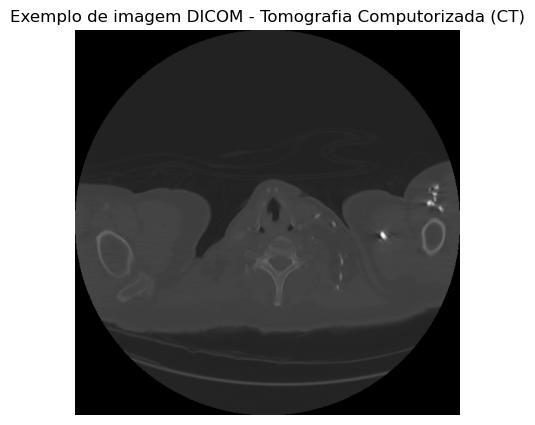

In [12]:
# Caminho para um ficheiro DICOM de CT
ct_example = Path.cwd() / "dataset" / "manifest-1600709154662" / "LIDC-IDRI" / "LIDC-IDRI-0003" / "01-01-2000-NA-NA-94866" / "3000611.000000-NA-03264"

# Encontra o primeiro ficheiro .dcm nessa pasta
ct_dcm = next(ct_example.rglob("*.dcm"))

# Lê o ficheiro DICOM
ct_img = pydicom.dcmread(ct_dcm)

# Mostra informações básicas
print(f"Modality: {ct_img.Modality}")
print(f"Patient ID: {ct_img.PatientID}")
print(f"Image shape: {ct_img.pixel_array.shape}")

# Mostra a imagem
plt.figure(figsize=(5,5))
plt.imshow(ct_img.pixel_array, cmap="gray")
plt.title("Exemplo de imagem DICOM - Tomografia Computorizada (CT)")
plt.axis("off")
plt.show()


Exemplo ficheiro DICOM de radiografia

Modality: DX
Patient ID: LIDC-IDRI-0003
Image shape: (2022, 2022)


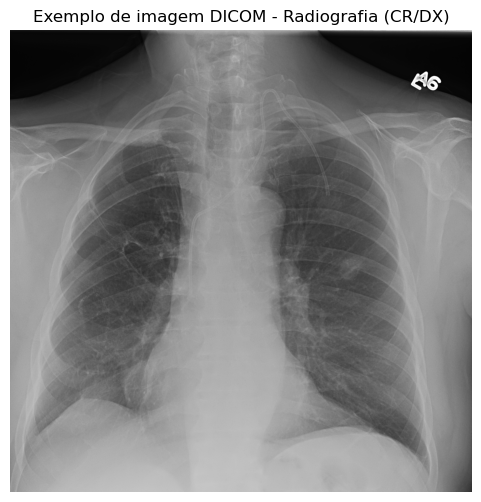

In [11]:
# Caminho para um ficheiro DICOM de radiografia (ajusta conforme o teu dataset)
xray_example = Path.cwd() / "dataset" / "manifest-1600709154662" / "LIDC-IDRI" / "LIDC-IDRI-0003" / "01-01-2000-NA-NA-59141"/"3000978.000000-NA-59882"

# Encontra o primeiro ficheiro DICOM
xray_dcm = next(xray_example.rglob("*.dcm"))

# Lê o ficheiro
xray_img = pydicom.dcmread(xray_dcm)

# Mostra informações básicas
print(f"Modality: {xray_img.Modality}")
print(f"Patient ID: {xray_img.PatientID}")
print(f"Image shape: {xray_img.pixel_array.shape}")

# Mostra a imagem
plt.figure(figsize=(6,6))
plt.imshow(xray_img.pixel_array, cmap="gray")
plt.title("Exemplo de imagem DICOM - Radiografia (CR/DX)")
plt.axis("off")
plt.show()


Exemplo de fatia axial da tomografia computadorizada

Loading dicom files ... This may take a moment.


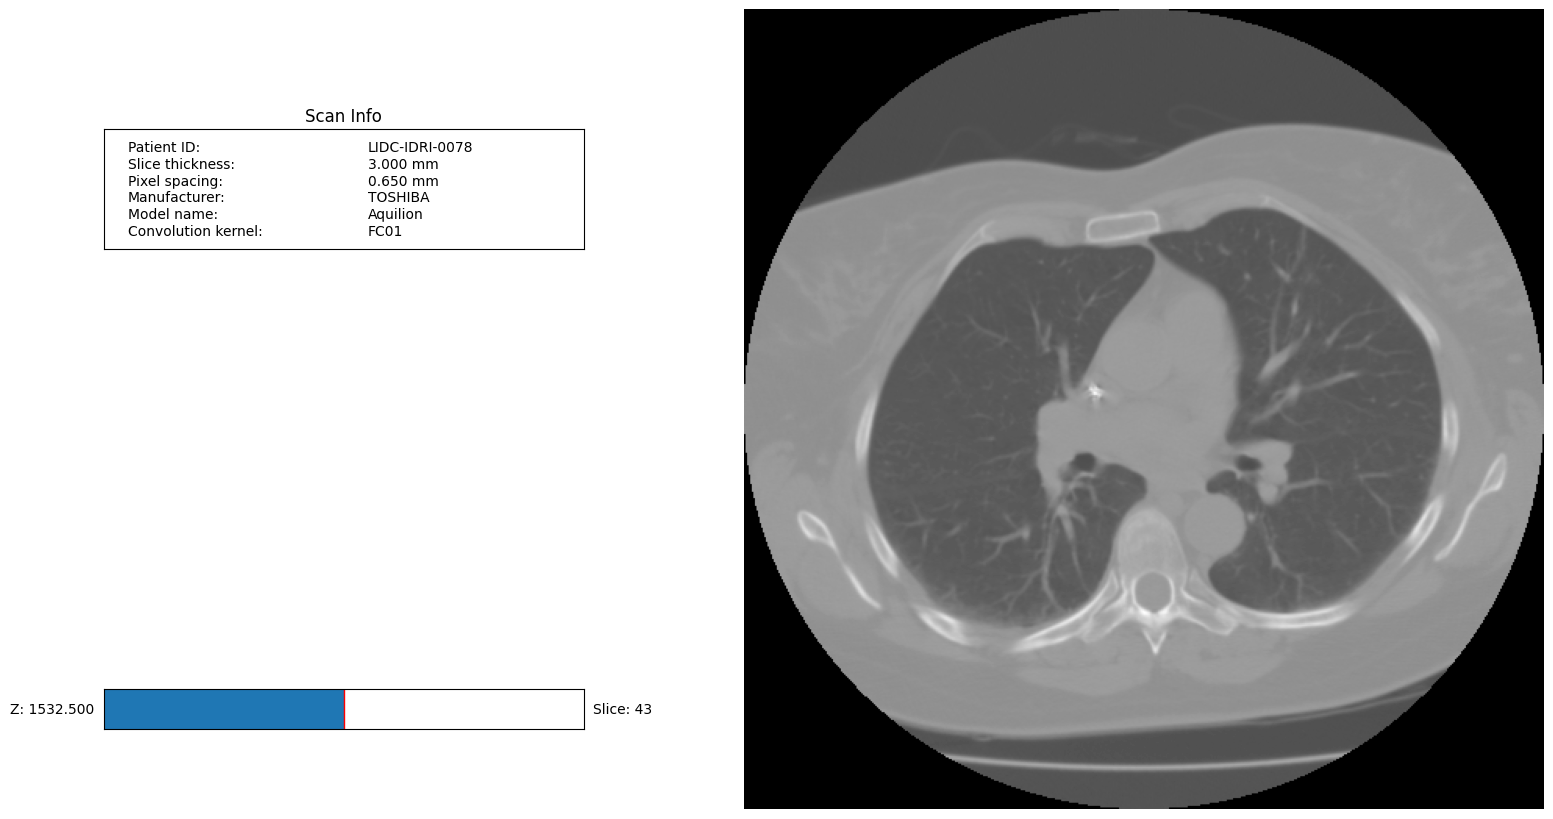

In [28]:
# Get the first patient (scan with annotations)
scan = pl.query(pl.Scan).filter(pl.Scan.annotations.any()).first()

# Visualize the first annotation from that scan
scan.visualize()

## **Pré-processamento e preparação dos dados**

Para o desenvolvimento do modelo de classificação de cancro do pulmão, serão utilizados exclusivamente os estudos de tomografia computorizada (CT) do dataset LIDC-IDRI que possuam ficheiros XML correspondentes com anotações válidas de nódulos ≥ 3 mm.
As imagens DICOM servirão como dados de entrada, enquanto os valores de malignidade anotados nos XML constituirão as labels (variável alvo).
Os ficheiros de diagnóstico clínico (tcia-diagnosis-data.xls) e de contagem de nódulos (lidc-idri-nodule-counts.xlsx) são complementares, podendo ser utilizados apenas para validação e exploração adicional.
Estudos de modalidade CR/DX (radiografias) e casos sem anotações radiológicas serão excluídos, uma vez que não contribuem para o objetivo de classificação baseado em imagens CT.

## **Extração das colunas**

Neste projeto, são extraídos vários tipos de características a partir das imagens e anotações do conjunto de dados LIDC-IDRI, com o objetivo de representar os nódulos pulmonares de forma completa e multidimensional. As principais categorias de features são:

- Características radiómicas: descritores quantitativos derivados da imagem, que medem propriedades como forma, intensidade e textura (GLCM, GLRLM, GLSZM, GLDM). Estes parâmetros permitem avaliar a heterogeneidade, regularidade e estrutura interna do nódulo, características frequentemente associadas ao seu potencial maligno segundo o artigo científico **[8]** e **[9]**.


- Características geométricas: calculadas a partir das anotações dos radiologistas, incluem medidas como o diâmetro médio, área de superfície, volume e centróide físico em milímetros. Estas métricas descrevem a morfologia global do nódulo, permitindo distinguir padrões associados a crescimento irregular ou formas mais esféricas, frequentemente relacionados ao grau de malignidade.

- Ratings semânticos dos radiologistas: atributos qualitativos provenientes das anotações do LIDC-IDRI, como subtlety, internalStructure, calcification, sphericity, margin, lobulation, spiculation, texture e malignancy. Para cada um, é calculada a mediana entre anotadores, refletindo o consenso clínico sobre o aspeto visual e comportamento do nódulo.

- Características profundas (deep features): vetores numéricos extraídos automaticamente através de uma rede neural convolucional ResNet-18 pré-treinada no ImageNet, utilizada como feature extractor sem reentrenamento. As redes neuronais foram escolhidas por serem capazes de aprender representações hierárquicas complexas — desde bordos e texturas simples até padrões visuais abstratos — diretamente a partir das imagens, sem necessidade de definição manual de descritores com base no artigo **[10]**.
(usada para justificar o uso combinado de radiomics + deep learning) e no arigo **[11]**, (usada para sustentar a integração entre deep features e características radiómicas). Estudos recentes mostram que estas deep features complementam as radiómicas ao captarem padrões visuais de alto nível, melhorando a precisão e a robustez na classificação de nódulos benignos e malignos tendo em conta o paper **[10]**, (usado para justificar o uso combinado de radiomics + deep learning) e o paper **[12]**, (reforçando a ideia de que combinar múltiplos tipos de features melhora a precisão).

Assim, a combinação entre características radiómicas, geométricas, semânticas e profundas oferece uma representação abrangente e complementar do nódulo, integrando tanto informação quantitativa como perceções visuais aprendidas automaticamente, o que potencia uma análise mais discriminativa e clinicamente relevante.

 1. Parâmetros de Pré-processamento e Extração de Características

Para garantir a reprodutibilidade e comparabilidade das características radiômicas extraídas, definiram-se parâmetros de pré-processamento baseados em práticas recomendadas pela literatura e implementações padrão em bibliotecas reconhecidas.

Em primeiro lugar, foi utilizado um largura de bin fixa de 25 Unidades de Hounsfield (HU) para a discretização dos níveis de cinzento nas imagens de tomografia computorizada (CT). Este valor corresponde à configuração padrão do PyRadiomics, conforme as recomendações da Image Biomarker Standardization Initiative (IBSI) para imagens CT. A escolha de uma binagem fixa permite reduzir o ruído e assegurar a consistência entre exames adquiridos com diferentes parâmetros de aquisição. Tal procedimento está alinhado com o fluxo de trabalho radiômico padronizado descrito no artigo científico **[13]**, que enfatiza a importância da normalização técnica e do uso de ferramentas abertas e reprodutíveis.

In [3]:
BIN_WIDTH: int = 25

Em seguida, todas as imagens foram reamostradas para uma resolução isotrópica de 2×2×2 mm³, de forma a uniformizar o tamanho dos voxels e minimizar variações derivadas da espessura de corte ou da resolução em plano. A reamostragem é uma etapa essencial em radiômica, pois diferenças de voxel podem alterar substancialmente as medições geométricas e texturais. O espaçamento de 2 mm foi escolhido como um compromisso equilibrado entre estabilidade das características e eficiência computacional, conforme discutido no artigo científico **[13]**, que demonstram a influência da espessura de corte na reprodutibilidade dos descritores radiômicos.

In [4]:
RESAMPLED_PIXEL_SPACING: Sequence[int] = (2, 2, 2)

Além da região tumoral central, foram também extraídas características de uma região perinodular com 3 mm de espessura em torno de cada nódulo. Esta área adjacente capta informações do microambiente tumoral — incluindo possíveis reações inflamatórias ou padrões de infiltração — que podem auxiliar na diferenciação entre nódulos benignos e malignos. A espessura de 3 mm é amplamente utilizada em estudos de radiômica pulmonar e segue a metodologia apresentada no paper **[13]**, onde são analisadas conjuntamente as regiões intranodular e perinodular para melhorar a capacidade discriminativa entre tipos de nódulos.

In [5]:
RING_THICKNESS_MM: float = 3.0

Finalmente, foi empregue um **limiar de 15 mm** no algoritmo de agrupamento **DBSCAN** para reunir as anotações de diferentes radiologistas que se referem ao mesmo nódulo físico. O conjunto de dados **LIDC-IDRI** contém até quatro segmentações independentes por lesão, frequentemente com pequenas variações de posição ou dimensão. O parâmetro `eps_mm`, definido como **15 mm**, representa a **distância máxima entre dois centróides** para que as suas anotações sejam consideradas pertencentes ao mesmo grupo. Este valor foi escolhido com base no **intervalo típico de tamanhos de nódulos** descritos no LIDC-IDRI, que variam aproximadamente entre **3 e 30 mm de diâmetro**. Assim, um limite de 15 mm — equivalente a cerca de **metade do diâmetro máximo** — permite agrupar anotações ligeiramente deslocadas do mesmo nódulo, sem o risco de fundir lesões próximas, mas distintas. Este valor também corresponde ao **parâmetro padrão da biblioteca PyLIDC**, que implementa o processo de criação de **máscaras de consenso** descrito no artigo **[7]** garantindo a **reprodutibilidade** do agrupamento e a **coerência** entre segmentações múltiplas do mesmo nódulo.


In [6]:
DBSCAN_EPS_MM: float = 15.0

Para otimizar o tempo de processamento, o pipeline foi configurado para utilizar até quatro tarefas em paralelo (MAX_PARALLEL_JOBS = 4). Este valor permite explorar o paralelismo disponível na maioria dos processadores modernos, acelerando a extração de características sem sobrecarregar a memória ou causar instabilidade no sistema. Assim, mantém-se um equilíbrio entre eficiência computacional e segurança de execução, especialmente em ambientes pessoais ou académicos com recursos limitados.
Adicionalmente, foi definido o parâmetro TQDM_NCOLS = 90, que controla a largura das barras de progresso (tqdm) apresentadas durante a execução do pipeline. Este parâmetro não afeta os resultados científicos, servindo apenas para melhorar a legibilidade e monitorização visual do progresso durante o processamento de grandes volumes de dados.

In [7]:
MAX_PARALLEL_JOBS: int = 4
TQDM_NCOLS: int = 90

**2. Gestão de Logs e Avisos**

Foi implementado um bloco de configuração destinado a controlar mensagens de log e avisos durante a execução do pipeline. Esta secção desativa avisos de compatibilidade e mensagens excessivas provenientes de bibliotecas externas como o PyRadiomics e o SimpleITK, garantindo uma execução mais limpa e focada apenas em erros relevantes.
O logger personalizado (LOGGER = logging.getLogger("lidc_pipeline")) assegura um registo simples e consistente das mensagens informativas, enquanto a função auxiliar log() permite imprimir mensagens imediatamente no terminal, facilitando o acompanhamento do progresso em tempo real.
Estas configurações não afetam os resultados científicos, mas melhoram a legibilidade, estabilidade e controlo do fluxo de execução do pipeline.

In [8]:
warnings.filterwarnings("ignore", category=FutureWarning)
radiomics.setVerbosity(logging.ERROR)
logging.getLogger("radiomics").setLevel(logging.ERROR)

try:
    sitk.ProcessObject_SetGlobalWarningDisplay(False)
except Exception:
    pass

LOGGER = logging.getLogger("lidc_pipeline")
if not LOGGER.handlers:
    logging.basicConfig(level=logging.INFO, format="%(message)s")

def log(msg: str) -> None:
    """Lightweight, flush-immediate logging."""
    print(msg, flush=True)

**3. Função de Espaçamento**

A função spacing_xyz_mm() obtém o espaçamento físico entre voxels em milímetros nas três dimensões (X, Y e Z) de um exame de tomografia computadorizada. Esses valores são fundamentais para converter medições geométricas e radiômicas em unidades físicas reais, permitindo a comparação entre diferentes exames. O código tenta primeiro obter o espaçamento diretamente dos metadados disponíveis no objeto Scan do pylidc (pixel_spacing e slice_thickness). Caso essas informações não estejam disponíveis, a função faz uma leitura alternativa diretamente dos cabeçalhos DICOM. Assim, garante-se que todos os cálculos de volume, diâmetro e textura sejam fisicamente coerentes e comparáveis entre pacientes e scanners distintos, o que é essencial para a reprodutibilidade do estudo.

In [9]:
def spacing_xyz_mm(scan: pl.Scan) :
    """Return (sx, sy, sz) spacing in millimeters, with DICOM fallback."""
    try:
        sx, sy = scan.pixel_spacing
        sz = scan.slice_thickness
        return float(sx), float(sy), float(sz)
    except Exception:
        d0 = scan.load_all_dicom_images()[0]
        ps = d0.PixelSpacing  # [row, col] = [y, x]
        return float(ps[1]), float(ps[0]), float(d0.SliceThickness)

**4. Funções de Agrupamento e Identificação de Nódulos**

O PyLIDC foi utilizado como componente fundamental para a preparação dos dados, pois permite transformar as anotações dos radiologistas do LIDC-IDRI em máscaras tridimensionais precisas dos nódulos pulmonares.
Essas máscaras definem as regiões de interesse (ROIs) utilizadas nas etapas seguintes de radiomics (extração de descritores manuais com o PyRadiomics) e de deep feature extraction (geração de vetores de características com a ResNet-18).
Assim, o PyLIDC garante que todas as análises subsequentes sejam realizadas sobre as mesmas regiões anatómicas, assegurando consistência, comparabilidade e rigor reprodutível em todo o pipeline.

As funções split_clusters_stable() e cluster_uid() têm como objetivo unificar as diferentes anotações feitas pelos radiologistas que, no conjunto de dados LIDC-IDRI, podem representar o mesmo nódulo pulmonar. Cada exame pode conter várias segmentações do mesmo nódulo, realizadas de forma independente por até quatro especialistas, o que resulta em pequenas variações na posição e no contorno de cada anotação. Para evitar que essas marcações sejam tratadas como lesões distintas, o pipeline agrupa automaticamente as anotações que se referem ao mesmo nódulo físico, garantindo uma identificação única, consistente e reprodutível em todo o processo de extração de características.

A função split_clusters_stable() utiliza o algoritmo de agrupamento DBSCAN (Density-Based Spatial Clustering of Applications with Noise) para reunir automaticamente as anotações que correspondem ao mesmo nódulo, considerando a distância entre os centróides das segmentações em milímetros. Esse processo é necessário porque, no conjunto de dados LIDC-IDRI, cada radiologista marca de forma independente os nódulos, e as suas delimitações podem apresentar pequenas variações de posição e dimensão.

In [10]:
def split_clusters_stable(scan: pl.Scan, spacing: Tuple[float, float, float], eps_mm: float = DBSCAN_EPS_MM) -> List[List[pl.Annotation]]:
    """Start with pylidc clusters; split further with DBSCAN in millimeters; sort by UID."""
    sx, sy, sz = spacing
    stable: List[List[pl.Annotation]] = []

    for cluster in scan.cluster_annotations():
        cents_mm = np.array([[a.centroid[2] * sz, a.centroid[1] * sy, a.centroid[0] * sx] for a in cluster])
        db = DBSCAN(eps=eps_mm, min_samples=1).fit(cents_mm)
        for lbl in np.unique(db.labels_):
            sub = [a for j, a in enumerate(cluster) if db.labels_[j] == lbl]
            stable.append(sub)

    stable.sort(key=lambda s: cluster_uid(s))
    return stable

Já a função cluster_uid() gera um identificador único e determinístico para cada grupo formado. Quando as anotações contêm um campo id, o UID é construído a partir desses valores ordenados; caso contrário, é derivado das coordenadas arredondadas do centróide de cada anotação. Esse procedimento assegura que o mesmo nódulo receba sempre o mesmo identificador, independentemente da ordem de execução ou do ambiente computacional.

In [11]:
def cluster_uid(anns: Sequence[pl.Annotation]) -> str:
    """Stable cluster UID based on annotation DB IDs, else rounded centroids."""
    ids = [getattr(a, "id", None) for a in anns]
    if all(i is not None for i in ids):
        return "ann-" + "_".join(str(int(i)) for i in sorted(ids))
    cents: List[Tuple[int, int, int]] = []
    for a in anns:
        c = a.centroid  # (row=y, col=x, slice=z) in pylidc; using given order
        cents.append(tuple(int(round(x)) for x in (c[0], c[1], c[2])))
    return "cent-" + "_".join(f"{x}-{y}-{z}" for (x, y, z) in sorted(cents))

**5. Funções de Construção de Máscara e Geração de Anel Perinodular**

As funções build_consensus_mask() e ring_mask() têm propósitos complementares, mas distintos dentro do pipeline radiômico. A primeira define onde está o nódulo, enquanto a segunda define o que está em volta dele

A função build_consensus_mask() cria a máscara principal (core) do nódulo, combinando todas as segmentações feitas pelos diferentes radiologistas que o anotaram. Esse processo é realizado através de uma união booleana (OR) entre as máscaras individuais, o que garante que toda a área considerada como parte do nódulo por qualquer especialista seja incluída na região final. O resultado é uma representação tridimensional única e consolidada do nódulo, utilizada para calcular as características internas — como forma, textura e intensidade — que descrevem a estrutura e composição do tumor.

In [12]:
def build_consensus_mask(shape: Tuple[int, int, int], anns: Sequence[pl.Annotation]) -> np.ndarray:
    """Boolean union of all annotation masks in a cluster."""
    m = np.zeros(shape, dtype=bool)
    for a in anns:
        z, y, x = a.bbox()
        m[z, y, x] |= a.boolean_mask()
    return m

Já a função ring_mask() gera uma segunda região, chamada de anel perinodular (peri), que envolve o nódulo e corresponde ao tecido pulmonar imediatamente adjacente à lesão. Esta região é criada dilatando a máscara principal em três dimensões e removendo a área original do nódulo, formando um anel com espessura física definida (por padrão, 3 mm). O objetivo é permitir a extração de características do microambiente tumoral, uma vez que alterações no tecido ao redor — como inflamação, infiltração ou irregularidade — podem fornecer pistas importantes sobre a agressividade e o potencial maligno do nódulo.

In [13]:
def ring_mask(mask: np.ndarray, spacing: Tuple[float, float, float], mm: float = RING_THICKNESS_MM) -> np.ndarray:
    """Perinodular ring (~mm thick) around mask using 3D dilation."""
    sx, sy, sz = spacing
    vx, vy, vz = [max(1, int(round(mm / s))) for s in (sx, sy, sz)]
    se = np.ones((vz * 2 + 1, vy * 2 + 1, vx * 2 + 1), dtype=bool)
    return np.logical_and(binary_dilation(mask, structure=se), ~mask)

A função hu_window(img, c=-600, w=1500) aplica o chamado windowing em Unidades de Hounsfield (HU), um procedimento comum em tomografia computorizada que serve para destacar o intervalo de densidades relevantes de acordo com o tecido estudado. No contexto pulmonar, o valor central de −600 HU e a largura de 1500 HU abrangem o intervalo típico do parênquima pulmonar, excluindo valores extremos como o ar (muito baixos) e o osso (muito altos). Após esse recorte, a função normaliza os valores para o intervalo [0,1], o que estabiliza a entrada do modelo e assegura que as intensidades processadas pela rede estejam numa escala padronizada e comparável entre exames.

In [14]:
def hu_window(img: np.ndarray, c: int = -600, w: int = 1500) -> np.ndarray:
    """Apply HU windowing and scale to [0, 1]."""
    lo, hi = c - w / 2, c + w / 2
    return np.clip((img - lo) / (hi - lo), 0, 1)

Exemplo de um nódulo pulmonar e região perinodular (~3 mm) na tomografia computadorizada

Loading dicom files ... This may take a moment.


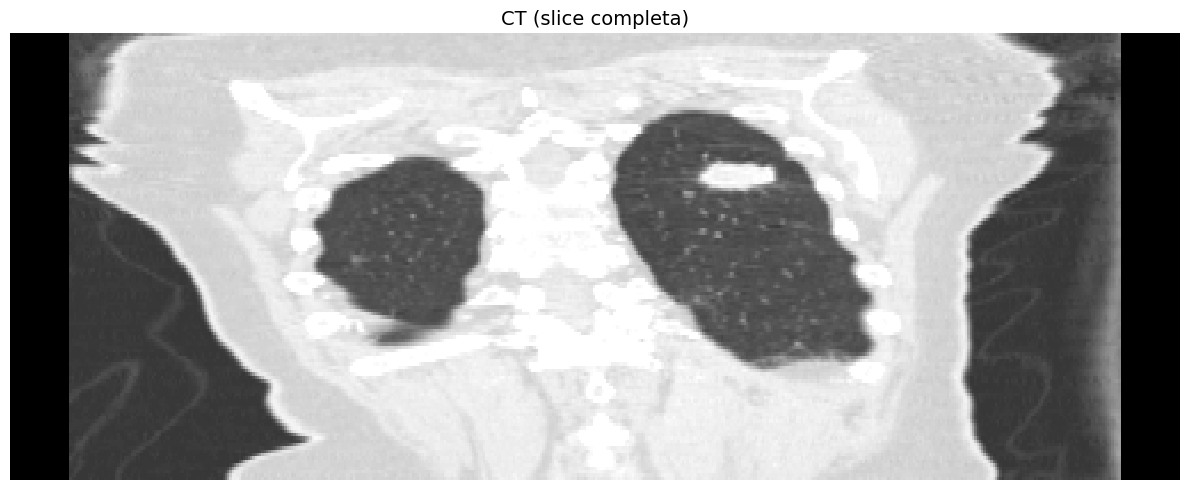

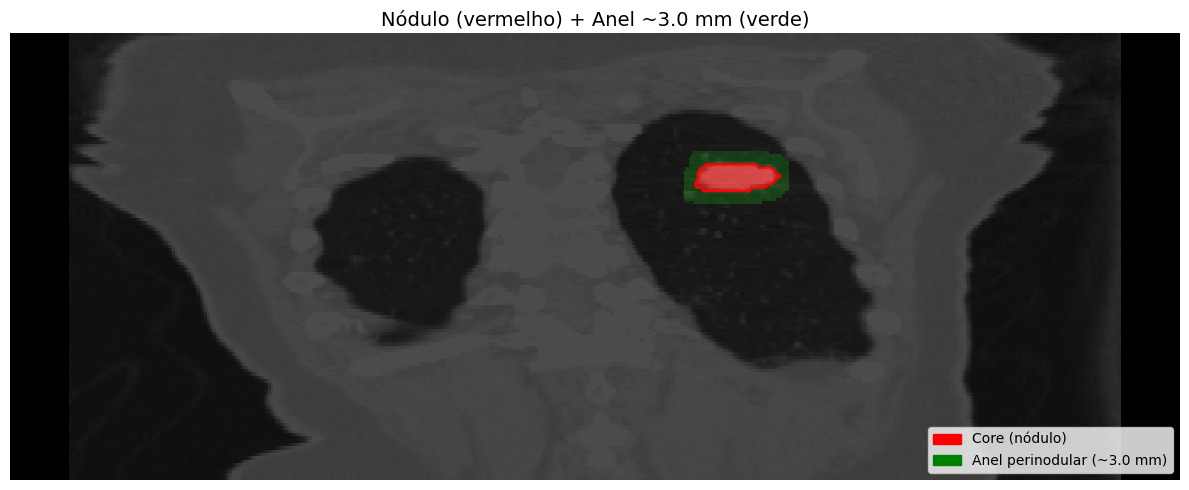

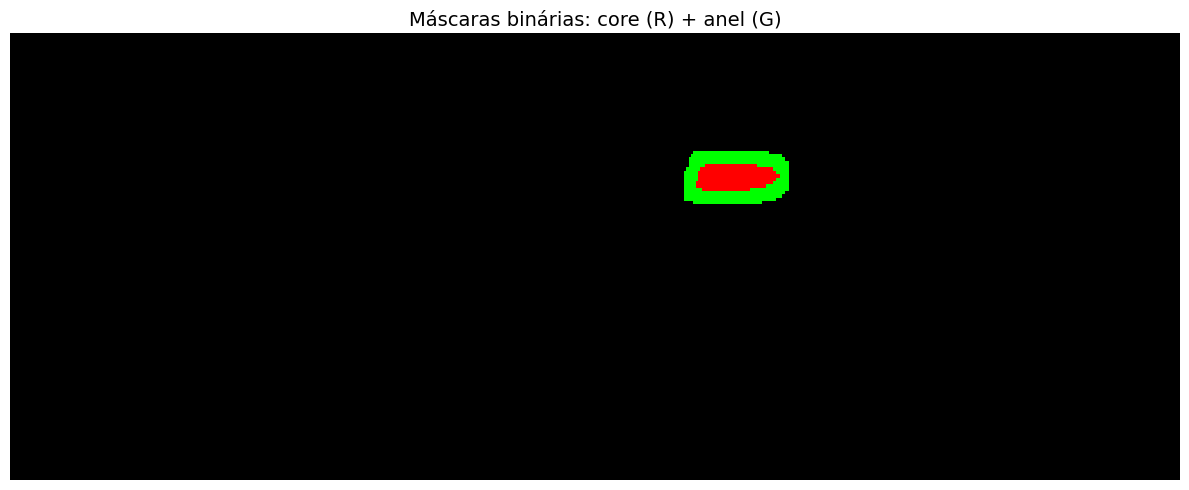

In [15]:
# ============================================
# LOAD FIRST PATIENT AND ANNOTATION
# ============================================
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == 'LIDC-IDRI-0001').first()
annotation = scan.annotations[0]

# DICOM voxel spacing
ps = scan.pixel_spacing
if isinstance(ps, (float, int)):
    sx = sy = float(ps)
else:
    sy = float(ps[0])
    sx = float(ps[1])
sz = float(scan.slice_thickness)
spacing = (sx, sy, sz)

# Volume (HU)
vol = scan.to_volume()
if isinstance(vol, tuple):
    vol = vol[0]
vol = vol.astype(np.float32)

# Mask (core)
mask = np.zeros(vol.shape, dtype=bool)
z, y, x = annotation.bbox()
mask[z, y, x] |= annotation.boolean_mask()

# Ring
ring = ring_mask(mask, spacing)

# Slice with largest area
areas = mask.sum(axis=(1, 2))
z_best = int(np.argmax(areas))
img_slice = vol[z_best]
core_slice = mask[z_best]
ring_slice = ring[z_best]

# Rotate 90° to match viewer orientation
img_rot = np.rot90(img_slice)
core_full = np.rot90(core_slice)
ring_full = np.rot90(ring_slice)

# Window HU for display
img_disp = hu_window(img_rot)
H, W = img_disp.shape


# ============================================
# VISUALIZATION (same proportions as 2-panel)
# ============================================

# ---------- 1) CT slice ----------
plt.figure(figsize=(12, 5))
plt.imshow(img_disp, cmap="gray", interpolation="nearest", aspect='auto')
plt.title("CT (slice completa)", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()


# ---------- 2) Overlay: nódulo + anel ----------
plt.figure(figsize=(12, 5))
plt.imshow(img_disp, cmap="gray", interpolation="nearest", aspect='auto')

# Overlay colors
ring_rgb = np.zeros((H, W, 3), float); ring_rgb[..., 1] = ring_full.astype(float)
core_rgb = np.zeros((H, W, 3), float); core_rgb[..., 0] = core_full.astype(float)
plt.imshow(ring_rgb, alpha=0.35, interpolation="nearest", aspect='auto')
plt.imshow(core_rgb, alpha=0.55, interpolation="nearest", aspect='auto')

# Red outline for clarity
for cnt in measure.find_contours(core_full, 0.5):
    plt.plot(cnt[:, 1], cnt[:, 0], color="red", linewidth=1.6)

plt.title(f"Nódulo (vermelho) + Anel ~{RING_THICKNESS_MM} mm (verde)", fontsize=14)
plt.axis("off")

# Legend
plt.legend(
    handles=[
        mpatches.Patch(color="red", label="Core (nódulo)"),
        mpatches.Patch(color="green", label=f"Anel perinodular (~{RING_THICKNESS_MM} mm)")
    ],
    loc="lower right", frameon=True
)
plt.tight_layout()
plt.show()


# ---------- 3) Binary masks ----------
plt.figure(figsize=(12, 5))
mask_view = np.zeros((H, W, 3), float)
mask_view[..., 0] = core_full.astype(float)
mask_view[..., 1] = ring_full.astype(float)
plt.imshow(mask_view, interpolation="nearest", aspect='auto')
plt.title("Máscaras binárias: core (R) + anel (G)", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()


**6. Agregação de Classificações**

A função consensus_malignancy() agrega as classificações de malignidade atribuídas por diferentes radiologistas a um mesmo nódulo do conjunto de dados LIDC-IDRI. Cada anotador atribui uma pontuação de 1 a 5, onde 1–2 indicam nódulos benignos, 3 corresponde a um caso indeterminado e 4–5 sugerem malignidade. A função filtra os valores válidos, calcula a mediana e devolve esse valor como medida de consenso. No modo binário, converte 1–2 em 0 (benigno) e 4–5 em 1 (maligno), marcando como NaN os casos com mediana igual a 3. Esta opção segue a prática adotada em diversos estudos, como por exemplo o artigo científico **[14]**, que também excluíram os nódulos classificados como 3 por representarem situações ambíguas. Tal decisão evita a introdução de ruído e assegura uma separação mais nítida entre classes, permitindo que os modelos aprendam padrões consistentes e clinicamente interpretáveis.

In [ ]:
def consensus_malignancy(labels, mode="ordinal"):
    vals = [int(x) for x in labels if x is not None and not (isinstance(x, float) and math.isnan(x))]
    if not vals:
        return np.nan
    
    med = int(np.median(vals))

    if mode == "ordinal":
        return med

    if med in (1, 2):
        return 0  
    elif med in (4, 5):
        return 1  
    else:
        return np.nan  

**7. Extração Radiómica**

As funções make_extractor() e radiomics_on() são responsáveis pela configuração e execução do extrator PyRadiomics, ferramenta usada para calcular automaticamente centenas de características quantitativas a partir das imagens médicas e das suas máscaras.

A função `make_extractor()` cria e configura o objeto `RadiomicsFeatureExtractor` com os parâmetros principais do estudo, como a **largura de bin de 25 HU** (`binWidth`), o **reamostramento isotrópico de 2×2×2 mm³** (`resampledPixelSpacing`) e o interpolador **Nearest Neighbor**. Este interpolador é utilizado porque **mantém os valores originais de intensidade (Hounsfield Units)** do exame de tomografia, sem criar novos valores por média ou suavização. Ao contrário de métodos como bilinear ou spline, que podem introduzir artefactos e alterar a textura da imagem, o *Nearest Neighbor* assegura que as intensidades reais do tecido são preservadas, garantindo que as **características radiômicas** (especialmente as de textura e intensidade) sejam **fisicamente fiéis, comparáveis e reprodutíveis**. Além disso, a função ativa apenas as famílias de características mais relevantes — **forma**, **primeira ordem (intensidade)** e **textura** (**GLCM**, **GLRLM**, **GLSZM**, **GLDM**) — desativando o restante para reduzir redundância e tempo de processamento, mantendo o foco nas métricas mais informativas para a caracterização dos nódulos pulmonares.


In [ ]:
def make_extractor() -> featureextractor.RadiomicsFeatureExtractor:
    """Create a Radiomics extractor with the same settings as original code."""
    params = {
        "binWidth": BIN_WIDTH,
        "resampledPixelSpacing": list(RESAMPLED_PIXEL_SPACING),
        "interpolator": sitk.sitkNearestNeighbor, 
        "correctMask": True,
    }
    ext = featureextractor.RadiomicsFeatureExtractor(**params)
    ext.disableAllFeatures()
    for f in ("shape", "firstorder", "glcm", "glrlm", "glszm", "gldm"):
        ext.enableFeatureClassByName(f)
    return ext

A função radiomics_on() aplica o extrator previamente configurado a um determinado volume e à respetiva máscara, executando o cálculo das características radiômicas e devolvendo os resultados num dicionário estruturado. Cada característica é identificada com um prefixo — core__ para as extraídas da região central do nódulo e peri__ para as obtidas no anel perinodular — permitindo distinguir e comparar, de forma organizada, as propriedades internas e as do tecido circundante. Em conjunto, estas funções asseguram uma extração de características padronizada, reprodutível e clinicamente significativa, em conformidade com as recomendações do artigo **[15]** e as boas práticas descritas em **[13]**.

In [ ]:
def radiomics_on(mask: np.ndarray, vol: np.ndarray, prefix: str, ext: featureextractor.RadiomicsFeatureExtractor) -> dict:
    """Run PyRadiomics on a volume/mask and prefix feature names.

    NOTE: We intentionally do not set SITK spacing here to preserve the
    original behavior one-to-one with your script.
    """
    img = sitk.GetImageFromArray(vol)
    msk = sitk.GetImageFromArray(mask.astype(np.uint8))
    feats = ext.execute(img, msk)
    return {f"{prefix}__{k}": float(v) for k, v in feats.items() if "diagnostics" not in k}

**8. Extração de Deep Features**

Classe que cria um extrator de características a partir de uma ResNet-18 pré-treinada no ImageNet, uma rede neural convolucional amplamente utilizada em visão computacional. A ResNet-18 é composta por 18 camadas e foi originalmente desenvolvida para tarefas de classificação de imagens, tendo aprendido a reconhecer padrões visuais genéricos como bordos, texturas e formas a partir de milhões de exemplos. No entanto, neste projeto, ela é usada apenas como ferramenta de extração de descritores visuais, e não para classificação.

A função remove a camada final de classificação (children()[:-1]), mantendo apenas o backbone convolucional, que transforma cada imagem (ou fatia) num vetor de 512 dimensões representando a força com que diferentes padrões visuais aparecem nessa imagem. Todos os pesos da rede são congelados (requires_grad = False) para evitar qualquer reentrenamento com dados médicos, garantindo reprodutibilidade e prevenindo sobreajuste. Assim, a ResNet-18 atua como um scanner visual inteligente, convertendo cada fatia de tomografia numa representação numérica abstrata que descreve as suas características visuais, como textura, forma e estrutura, complementando as medidas radiômicas tradicionais.

As features resultantes, designadas por deep2d_num, representam essas características visuais extraídas automaticamente pela rede. Cada fatia do nódulo gera um vetor de 512 valores (as ativações dos filtros convolucionais), e a função deep_embed() calcula a média e o desvio-padrão dessas ativações entre as fatias do mesmo nódulo. As primeiras 512 features (deep2d_0000–deep2d_0511) correspondem à média dos padrões visuais, enquanto as restantes 512 (deep2d_0512–deep2d_1023) representam a variação desses padrões entre fatias. No conjunto, formam um vetor de 1024 dimensões que descreve de forma compacta e abstrata o aspeto visual do nódulo, permitindo captar diferenças de textura, heterogeneidade e estrutura que podem estar associadas ao seu grau de malignidade.

In [ ]:
class ResNet18_Embed(nn.Module):
    """Frozen ResNet-18 backbone producing a 512-D feature per slice."""
    def __init__(self) -> None:
        super().__init__()
        m = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        self.backbone = nn.Sequential(*list(m.children())[:-1])
        for p in self.backbone.parameters():
            p.requires_grad = False

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.backbone(x).flatten(1)

A função `prepare_model(device="cpu")` é responsável por preparar o modelo de rede neural que será usado para extrair as *deep features* das imagens. Primeiro cria o modelo `ResNet18_Embed()`, uma versão da **ResNet-18 pré-treinada no ImageNet** adaptada para atuar como **extrator de padrões visuais**. Em vez de classificar imagens, esta rede transforma cada fatia da tomografia num vetor numérico que descreve as suas **características visuais** como textura, contornos e forma. Em seguida, a função força o uso da **CPU** (`device="cpu"`) para que o processamento seja igual em qualquer ambiente, mesmo sem GPU, garantindo que os resultados sejam **reprodutíveis**. O modelo é colocado em modo de **avaliação** (`eval()`) para desativar funções usadas apenas durante o treino e assegurar saídas estáveis e determinísticas. Também é definida uma **transformação (`tfm`)** que prepara cada fatia antes de entrar no modelo, convertendo a imagem em tensor no formato que a rede entende, **redimensionando-a para 224×224 píxeis**, o tamanho esperado pela ResNet-18, e normalizando os valores de intensidade. No final, a função devolve três elementos: o **modelo configurado**, as **transformações definidas** e o **dispositivo de execução (CPU)**, que são utilizados posteriormente pela função `deep_embed()` para gerar as representações numéricas do nódulo.


In [ ]:
def prepare_model(device: str = "cpu"):
    """
    Create the feature extractor model, transform, and device.
    CPU-only: device is forced to 'cpu' regardless of input.
    """
    dev_str = "cpu"
    dev = torch.device(dev_str)
    log(f"⚙️ Using {dev_str.upper()}")

    model = ResNet18_Embed().to(dev).eval()
    tfm = T.Compose([T.ToTensor(), T.Resize((224, 224))])
    return model, tfm, dev

A função deep_embed() transforma as fatias do nódulo em vetores numéricos que representam o seu aspeto visual. Cada fatia é normalizada com hu_window(), convertida para o intervalo [0,255], redimensionada para 224×224 píxeis e repetida em três canais (RGB), compatíveis com a ResNet-18. As fatias são depois empilhadas num batch e processadas pelo modelo, que gera um vetor de 512 valores por fatia, correspondentes aos padrões visuais detetados pela rede (como textura e forma). No fim, a função calcula a média e o desvio-padrão desses vetores e junta ambos num vetor final de 1024 dimensões, que resume o padrão visual e a heterogeneidade do nódulo.

In [ ]:
@torch.no_grad()
def deep_embed(slices, model, tfm, dev: torch.device) -> np.ndarray:
    """
    Compute per-slice embeddings and return mean+std (1024-D).
    CPU-only: no autocast/AMP. 'dev' must be a torch.device.
    """
    imgs = [tfm((hu_window(s) * 255).astype(np.uint8)).repeat(3, 1, 1) for s in slices]
    batch = torch.stack(imgs).to(dev)

    f = model(batch)                    
    f_np = f.detach().float().cpu().numpy()
    return np.concatenate([f_np.mean(0), f_np.std(0)])  


**9. Função Central de Processamento**

A função process_nodule é o núcleo da pipeline, o ponto onde todas as etapas anteriores se unem para gerar um registo completo e padronizado de cada nódulo. Recebo o volume de TC (vol), o espaçamento físico entre voxels (spacing), as anotações feitas pelos radiologistas (anns), o extrator radiômico configurado (extractor) e, se ativo, o pacote deep (deep_pack = (model, tfm, device)). A partir destes elementos, construo as regiões de interesse — a máscara de consenso e o anel perinodular — e extraio as características radiômicas e, quando aplicável, as deep features. Em seguida, calculo os alvos de referência (binário e ordinal) com base nas avaliações de malignidade, consolidando todas as informações num único registo para cada nódulo.

Depois da extração destas features, calculo as métricas geométricas médias a partir das anotações — diâmetro, área de superfície e volume — e determino o centróide físico do nódulo em milímetros, garantindo medições consistentes e comparáveis entre exames. A seguir, agrego apenas a mediana dos ratings semânticos do LIDC (por atributo), como subtlety, internalStructure, calcification, sphericity, margin, lobulation, spiculation, texture e malignancy. No final, a função devolve um registo plano e completo que reúne todas as informações relevantes: PatientID, ClusterUID, número de anotadores, rótulos binário e ordinal, medidas geométricas, centróide, medianas dos ratings e todas as features radiômicas e deep. Este formato garante um processo determinístico, reprodutível e resumível, pronto para ser integrado num ficheiro CSV e utilizado diretamente nas fases de treino e validação dos modelos.

In [ ]:
def process_nodule(
    vol: np.ndarray,
    spacing: Tuple[float, float, float],            # (sz, sy, sx) in mm
    anns: Sequence[pl.Annotation],
    extractor: featureextractor.RadiomicsFeatureExtractor,
    deep_pack: Optional[Tuple[object, object, object]],  # (model, tfm, device)
    pid: str,
    skip_deep: bool,
) -> dict:
    # ---------------- 1 Masks ----------------
    mask = build_consensus_mask(vol.shape, anns)
    peri = ring_mask(mask, spacing)

    # ---------------- 2 Radiomics ----------------
    feats = {
        **radiomics_on(mask, vol, "core", extractor),
        **radiomics_on(peri, vol, "peri", extractor),
    }

    # ---------------- 3 Targets (consensus labels) ----------------
    labs = [a.malignancy for a in anns]
    cons_bin = consensus_malignancy(labs, "binary")
    cons_ord = consensus_malignancy(labs, "ordinal")

    # ---------------- 4 Deep features (optional) ----------------
    deep: dict = {}
    if (not skip_deep) and deep_pack:
        model, tfm, dev = deep_pack
        zc = int(np.argmax(mask.sum(axis=(1, 2))))
        zs = range(max(0, zc - 2), min(vol.shape[0], zc + 3))
        sl = [vol[z] for z in zs]
        try:
            vec = deep_embed(sl, model, tfm, dev)
            deep = {f"deep2d_{i:04d}": float(v) for i, v in enumerate(vec)}
        except RuntimeError as e:
            print(f"[WARN] Deep embedding failed for {pid}: {e}")
            deep = {}

    # ---------------- 5 Geometry from annotations (means) ----------------
    diameters = [a.diameter for a in anns if getattr(a, "diameter", None)]
    surfaces  = [a.surface_area for a in anns if getattr(a, "surface_area", None)]
    volumes   = [a.volume for a in anns if getattr(a, "volume", None)]
    diam_mm  = float(np.mean(diameters)) if diameters else np.nan
    surf_mm2 = float(np.mean(surfaces))  if surfaces  else np.nan
    vol_mm3  = float(np.mean(volumes))   if volumes   else np.nan

    # ---------------- 6 Centroid in millimeters (from final mask) ----------------
    # mask is (Z,Y,X), spacing = (sz, sy, sx) in mm
    idx = np.argwhere(mask)
    if idx.size > 0:
        zc_vox, yc_vox, xc_vox = idx.mean(axis=0)
        sz, sy, sx = spacing
        cz_mm, cy_mm, cx_mm = float(zc_vox*sz), float(yc_vox*sy), float(xc_vox*sx)
    else:
        cz_mm = cy_mm = cx_mm = np.nan

    # ---------------- 7 pylidc per-annotation ratings (aggregate) ----------------
    rating_fields = [
        "subtlety", "internalStructure", "calcification",
        "sphericity", "margin", "lobulation",
        "spiculation", "texture",
    ]
    rating_dict = {}
    for f in rating_fields:
        vals = [getattr(a, f) for a in anns if getattr(a, f, None) is not None]
        vals = np.array(vals, dtype=float) if len(vals) else np.array([])
        if len(vals):
            rating_dict[f"{f}_median"] = float(np.median(vals))
        else:
            rating_dict[f"{f}_median"] = np.nan
    # ---------------- 8) Return one row ----------------
    return {
        "PatientID": pid,
        "ClusterUID": cluster_uid(anns),     # your stable ID function
        "n_annotators": len(anns),

        # targets
        "consensus_binary": cons_bin,
        "consensus_ordinal": cons_ord,

        # geometry
        "diameter_mm": diam_mm,
        "surface_area_mm2": surf_mm2,
        "volume_mm3": vol_mm3,
        "cz_mm": cz_mm,
        "cy_mm": cy_mm,
        "cx_mm": cx_mm,

        # pylidc ratings
        **rating_dict,

        # features
        **feats,
        **deep,
    }


**10. Funções de Input/Output**

As funções deste bloco controlam a escrita dos resultados e tornam o pipeline resumível, ou seja, capaz de ser interrompido e retomado sem perder o progresso.

A função append_rows() é usada para guardar os resultados à medida que cada nódulo é processado. Se o ficheiro de saída (radiomic_resume.csv) já existir, as novas linhas são adicionadas no final; se não existir, é criado de raiz. Depois de cada escrita, é feita uma verificação imediata de duplicados, garantindo que cada nódulo (PatientID, ClusterUID) aparece apenas uma vez, mesmo que o processo tenha sido reiniciado.

In [ ]:
def append_rows(out_path: Path | str, rows: Sequence[dict]) -> None:
    out_path = Path(out_path)
    new_df = pd.DataFrame(rows)
    if out_path.exists():
        new_df.to_csv(out_path, mode="a", header=False, index=False)
    else:
        new_df.to_csv(out_path, index=False)

    # quick inline dedup (cheap because we write few rows at a time)
    df = pd.read_csv(out_path, low_memory=False)
    df.drop_duplicates(["PatientID", "ClusterUID"], keep="last", inplace=True)
    df.to_csv(out_path, index=False)


A função load_done_set() serve para verificar o que já foi processado. Lê apenas as colunas de identificação (PatientID e ClusterUID) do CSV e devolve um conjunto com esses pares. Assim, quando o pipeline é executado novamente, ele ignora automaticamente os nódulos já concluídos, processando apenas os que faltam. Se o ficheiro não puder ser lido, é emitido um aviso, mas o programa continua a correr normalmente.

In [ ]:
def load_done_set(out_path: Path | str) -> set[Tuple[str, str]]:
    done: set[Tuple[str, str]] = set()
    p = Path(out_path)
    if p.exists():
        try:
            d = pd.read_csv(p, usecols=["PatientID", "ClusterUID"])
            done = set(zip(d["PatientID"].astype(str), d["ClusterUID"].astype(str)))
        except Exception as e:
            log(f"⚠️ resume read error: {e}")
    return done

**11. Execução Principal**

A run_pipeline_resume() é responsável por executar todo o pipeline de forma segura e recomeçável. Primeiro, inicializo o extrator radiômico e, se estiver ativo, o modelo de deep features (ResNet-18). Depois, obtenho todos os exames do dataset LIDC-IDRI, ordeno-os pelo identificador do paciente para garantir sempre a mesma sequência de processamento e percorro cada um deles.

Para cada exame, obtenho o espaçamento físico, separo os nódulos com split_clusters_stable() e comparo a lista com o que já está gravado no ficheiro usando load_done_set(). Assim, só os nódulos pendentes são processados. Cada volume é convertido para float32 e passado à função process_nodule(), que extrai as features radiômicas e profundas.

Os resultados de cada nódulo são guardados imediatamente com append_rows(). Isso significa que, mesmo que o programa seja interrompido, os dados processados até esse ponto não se perdem. Se ocorrer algum erro, as informações correspondentes são registadas num ficheiro separado (radiomic_resume_errors.csv), o que facilita a revisão posterior.

A execução pode ser feita em modo paralelo, usando várias threads (n_jobs), mas a escrita no ficheiro é feita de forma sequencial, para evitar corrupções. No final da execução, o programa remove duplicados, salva novamente o CSV e indica o número total de registos processados.

O resultado é um pipeline determinístico, estável e recuperável — mesmo que seja interrompido, pode ser retomado sem repetir trabalho, mantendo o registo completo de todos os casos processados e dos erros ocorridos.

In [ ]:

def run_pipeline_resume(
    limit_scans: Optional[int] = None,
    n_jobs: int = 2,
    device: str = "auto",   # kept for API compatibility; ignored (forced to 'cpu')
    amp: bool = True,       # kept for API compatibility; ignored (forced to False)
    skip_deep: bool = False,
    out: str = "radiomic_resume.csv",
    err: str = "radiomic_resume_errors.csv",
) -> None:
    """Run the resumable pipeline across all scans (deterministic order). CPU-only."""
    forced_device = "cpu"

    extractor = make_extractor()
    deep_pack = None if skip_deep else prepare_model(forced_device)

    scans: List[pl.Scan] = pl.query(pl.Scan).all()
    scans.sort(key=lambda s: str(s.patient_id))  # deterministic order
    if limit_scans:
        scans = scans[:limit_scans]

    errors: List[dict] = []
    log(f" {len(scans)} scans | jobs={n_jobs} | device={forced_device} | skip_deep={skip_deep}")

    for scan in tqdm(scans, ncols=TQDM_NCOLS, desc="Scans"):
        pid = str(scan.patient_id)
        spacing = spacing_xyz_mm(scan)
        clusters = split_clusters_stable(scan, spacing, eps_mm=DBSCAN_EPS_MM)
        if not clusters:
            continue

        # refresh done set per scan
        done = load_done_set(out)
        pending = [sub for sub in clusters if (pid, cluster_uid(sub)) not in done]
        if not pending:
            continue

        vol = scan.to_volume().astype(np.float32) 

        def _one(sub: Sequence[pl.Annotation]) -> dict:
            uid = cluster_uid(sub)
            try:
                rec = process_nodule(vol, spacing, sub, extractor, deep_pack, pid, skip_deep)
                rec["ClusterUID"] = uid  # ensure explicit
                return {"ok": True, "rec": rec}
            except Exception as e:
                return {"ok": False, "err": repr(e), "PatientID": pid, "ClusterUID": uid}

        if n_jobs > 1:
            rs = Parallel(n_jobs=min(n_jobs, MAX_PARALLEL_JOBS), backend="threading")(
                delayed(_one)(sub) for sub in pending
            )
        else:
            rs = [_one(sub) for sub in pending]

        # write each success immediately -> truly resumable at any point
        to_write: List[dict] = []
        for r in rs:
            if r["ok"]:
                to_write.append(r["rec"])
                append_rows(out, [r["rec"]])  # atomic per-nodule flush
            else:
                errors.append(
                    {"PatientID": r["PatientID"], "ClusterUID": r["ClusterUID"], "error": r["err"]}
                )

        # save errors after each scan
        if errors:
            pd.DataFrame(errors).drop_duplicates(["PatientID", "ClusterUID", "error"]).to_csv(err, index=False)

    # final dedup (idempotent)
    out_path = Path(out)
    if out_path.exists():
        df = pd.read_csv(out_path, low_memory=False)
        df.drop_duplicates(["PatientID", "ClusterUID"], keep="last", inplace=True)
        df.to_csv(out_path, index=False)
        log(f"✅ Saved {out} | shape={df.shape}")

    if errors:
        pd.DataFrame(errors).drop_duplicates(["PatientID", "ClusterUID", "error"]).to_csv(err, index=False)
        log(f"ℹ️ Errors logged: {len(errors)}")

In [ ]:
run_pipeline_resume(n_jobs=4, device="auto", skip_deep=False)

### **Seleção das colunas**

Antes de iniciar o processo de análise e modelação, foi necessário realizar uma etapa de seleção e preparação do dataset de forma a garantir a consistência e integridade dos dados. O código apresentado tem como finalidade importar o ficheiro radiomic_resume_fixed.csv e proceder à limpeza inicial, assegurando que apenas são mantidas as observações e variáveis válidas para o estudo. Nesta fase, são identificadas e removidas entradas com rótulos (labels) inválidos ou sem identificador de paciente, selecionadas apenas as colunas numéricas relevantes e eliminadas variáveis suscetíveis de causar data leakage, como consensus_ordinal. Adicionalmente, são tratados valores infinitos, substituindo-os por NaN para evitar erros nas fases seguintes. O resultado é um conjunto de dados coerente e padronizado, armazenado no ficheiro dataset_clean.csv, que servirá como base sólida para as próximas etapas de filtragem de features e construção dos modelos de classificação.


In [ ]:
warnings.filterwarnings("ignore")

# =========================
# 1) LOAD & FIX LABEL/IDS
# =========================
SRC = "radiomic_resume_fixed.csv"
df0 = pd.read_csv(SRC)

# ---- IDs and label (fixed names) ----
LABEL  = "consensus_binary"             # already binary 0/1
GROUP  = "PatientID"                    # group/patient id
NODULE = "ClusterUID" if "ClusterUID" in df0.columns else None

# ---- Validate mandatory columns ----
missing = [c for c in [LABEL, GROUP] if c not in df0.columns]
if missing:
    raise ValueError(f"Missing required columns: {missing}. "
                     f"Available columns: {list(df0.columns)[:25]} ...")

# ---- Build y and clean invalid rows ----
y_raw = pd.to_numeric(df0[LABEL], errors="coerce")  # coerce to numeric
bad = (~np.isfinite(y_raw)) | (df0[GROUP].isna())
if bad.any():
    print(f"[Clean] Removing {int(bad.sum())} rows with invalid label/group.")
df = df0.loc[~bad].copy()
y_full = y_raw.loc[~bad].astype(int)
g_full = df[GROUP]

# ---- X base: numeric features only, remove leak columns, replace inf ----
ID_COLS = [c for c in [LABEL, GROUP, NODULE] if c is not None]
X_full = df.drop(columns=ID_COLS, errors="ignore")
X_full = X_full.select_dtypes(include=[np.number]).replace([np.inf, -np.inf], np.nan)

# Drop known leakage features discovered earlier
leak_cols = ["consensus_ordinal"]  # add others here if needed
X_full = X_full.drop(columns=leak_cols, errors="ignore")

print(f"[Clean] Dropped leak columns: {leak_cols}")
print(f"[Shapes] X={X_full.shape}, y={y_full.shape}, unique_groups={g_full.nunique()}")
print("[y counts]"); print(y_full.value_counts(dropna=False))

# =========================
# 2) SAVE CLEAN DATASET
# =========================
clean = pd.concat(
    [df[[c for c in [GROUP, NODULE, LABEL] if c is not None]].reset_index(drop=True),
     X_full.reset_index(drop=True)],
    axis=1
)
clean.to_csv("dataset_clean.csv", index=False)
print("Saved: dataset_clean.csv")


[Clean] Removing 1112 rows with invalid label/group.
[Clean] Dropped leak columns: ['consensus_ordinal']
[Shapes] X=(1499, 1240), y=(1499,), unique_groups=689
[y counts]
consensus_binary
0    1120
1     379
Name: count, dtype: int64
Saved: dataset_clean.csv


Após a criação do conjunto de dados limpo, foi realizada uma etapa de pré-filtragem independente do rótulo (label-agnostic prefiltering), cujo objetivo é reduzir a dimensionalidade inicial e eliminar redundâncias antes da aplicação de métodos supervisionados de seleção de features. Primeiramente, os valores em falta foram imputados utilizando a mediana de cada variável, garantindo consistência estatística sem introduzir viés. Em seguida, foram removidas as features com variância nula — isto é, variáveis constantes sem poder discriminativo. Posteriormente, foi analisada a matriz de correlação entre as variáveis, sendo excluídas aquelas com correlação superior a 0,95, de modo a evitar redundância e sobreajuste nos modelos. Esta filtragem resultou numa redução significativa do número de features, mantendo apenas as mais representativas em termos de informação independente. O dataset resultante foi guardado como dataset_prefilter.csv, servindo como base otimizada para as etapas seguintes de seleção supervisionada de features e treino dos modelos preditivos.


In [ ]:
# =========================
# 3) PREFILTER (label-agnostic)
# =========================
# Impute medians
imp = SimpleImputer(strategy="median")
X_imp = pd.DataFrame(imp.fit_transform(X_full), columns=X_full.columns, index=X_full.index)

# Remove zero-variance features
vt = VarianceThreshold(0.0)
X_vt = pd.DataFrame(vt.fit_transform(X_imp), index=X_imp.index)
vt_keep = X_imp.columns[vt.get_support()]
X_vt.columns = vt_keep

# Remove highly-correlated features (> 0.95) by keeping one per pair
corr = X_vt.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
drop_cols = [col for col in upper.columns if any(upper[col] > 0.95)]
X_pref = X_vt.drop(columns=drop_cols)

print(f"[Prefilter] {X_full.shape[1]} → {X_pref.shape[1]} features (no label used)")

pref = pd.concat(
    [df[[c for c in [GROUP, NODULE, LABEL] if c is not None]].reset_index(drop=True),
     X_pref.reset_index(drop=True)],
    axis=1
)
pref.to_csv("dataset_prefilter.csv", index=False)
print("Saved: dataset_prefilter.csv")

# Class weight scaling for XGBoost
pos = int(y_full.sum()); neg = int(len(y_full) - pos)
spw = (neg / pos) if pos > 0 else 1.0

[Prefilter] 1240 → 1138 features (no label used)
Saved: dataset_prefilter.csv


Após a fase de pré-filtragem, procedeu-se à aplicação de métodos de seleção de features com o objetivo de identificar e conservar as variáveis mais relevantes para o problema de classificação da malignidade dos nódulos pulmonares. Este bloco de código implementa quatro abordagens distintas de seleção e redução de dimensionalidade, permitindo comparar diferentes estratégias com base em critérios estatísticos, de importância de modelo e de variância explicada:


- T-test (SelectKBest): aplica um teste univariado de significância estatística (ANOVA F-test) para selecionar as 128 features com maior poder discriminativo entre classes (Ning et al., 2021).


- Random Forest Selection (RF median): utiliza a importância das variáveis num modelo de Random Forest para reter as features cujo peso é superior à mediana, refletindo a sua contribuição real na classificação (Boubnovski Martell et al., 2025).


- PCA (Principal Component Analysis): reduz o espaço dimensional ao projetar as features em componentes principais que explicam 95% da variância total, preservando a maior parte da informação original e eliminando redundâncias (Pang et al., 2021).


- None (passthrough): mantém todas as features após a pré-filtragem, permitindo comparar o desempenho sem redução adicional.


Cada método é aplicado sobre o dataset pré-filtrado para gerar diferentes versões de dados prontos para análise, que são exportadas em ficheiros independentes (selected_FULL__.csv). Estes conjuntos serão posteriormente utilizados na fase de modelação, possibilitando avaliar qual abordagem de seleção produz o melhor equilíbrio entre desempenho e generalização.


In [ ]:
# =========================
# 4) SELECTORS → SAVE FULL DATASETS (for inspection/deploy)
# =========================
selectors = {
    "ttest_k128": Pipeline([
        ("scaler", StandardScaler()),
        ("kbest", SelectKBest(score_func=f_classif, k=min(128, X_pref.shape[1]))),
    ]),
    "rfsel_med": SelectFromModel(
        RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1, class_weight="balanced"),
        threshold="median"
    ),
    "pca_95": Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=0.95, svd_solver="full")),
    ]),
    "none": "passthrough",
}

def fit_and_transform_selector(name, sel, X):
    """Fit selector on FULL prefiltered data (for export CSV only; do NOT use for evaluation)."""
    if sel == "passthrough":
        Xsel = X.values
        cols = list(X.columns)
        return pd.DataFrame(Xsel, columns=cols, index=X.index), cols

    pipe = sel if isinstance(sel, Pipeline) else Pipeline([("sel", sel)])
    pipe.fit(X, y_full)  # using all data is fine for EXPORT ONLY

    # get the terminal selector to name columns
    terminal = None
    if isinstance(sel, Pipeline):
        if "kbest" in sel.named_steps: terminal = pipe.named_steps["kbest"]
        elif "pca" in sel.named_steps: terminal = pipe.named_steps["pca"]
    if terminal is None:
        # try any step with get_support
        for step_name, step in getattr(pipe, "named_steps", {}).items():
            if hasattr(step, "get_support"):
                terminal = step
                break

    if hasattr(terminal, "get_support"):
        mask = terminal.get_support()
        cols = [c for c, keep in zip(X.columns, mask) if keep]
    elif hasattr(terminal, "n_components_"):
        cols = [f"pca_{i+1:03d}" for i in range(int(terminal.n_components_))]
    else:
        cols = [f"feat_{i}" for i in range(pipe.transform(X).shape[1])]

    Xsel = pipe.transform(X)
    return pd.DataFrame(Xsel, columns=cols, index=X.index), cols

for sel_name, sel in selectors.items():
    Xsel_df, cols = fit_and_transform_selector(sel_name, sel, X_pref)
    out = pd.concat(
        [df[[c for c in [GROUP, NODULE, LABEL] if c is not None]].reset_index(drop=True),
         Xsel_df.reset_index(drop=True)],
        axis=1
    )
    out.to_csv(f"selected_FULL__{sel_name}.csv", index=False)
    print(f"Saved: selected_FULL__{sel_name}.csv  (cols={len(cols)})")

Saved: selected_FULL__ttest_k128.csv  (cols=128)
Saved: selected_FULL__rfsel_med.csv  (cols=569)
Saved: selected_FULL__pca_95.csv  (cols=503)
Saved: selected_FULL__none.csv  (cols=1138)


Depois de gerados os diferentes conjuntos de features selecionadas, foi realizada a fase de modelação preditiva e avaliação de desempenho, onde se testaram múltiplos algoritmos de aprendizagem supervisionada. O objetivo desta etapa é identificar a combinação ideal entre o método de seleção de features e o modelo de classificação capaz de distinguir nódulos malignos de benignos com a maior eficácia possível. Para isso, foram testados quatro classificadores amplamente utilizados em estudos de radiomics e deep learning aplicados ao cancro do pulmão: Regressão Logística, Support Vector Machine (SVM), Random Forest e XGBoost.


A Regressão Logística é um modelo estatístico linear utilizado para problemas de classificação binária, que estima a probabilidade de um exemplo pertencer a uma classe através de uma função logística (sigmoid), sendo simples, eficiente e interpretável. O Support Vector Machine (SVM) procura o hiperplano ótimo que separa as classes com a maior margem possível, sendo particularmente eficaz em dados de alta dimensão e permitindo modelar relações não lineares através de funções kernel. O Random Forest (RF) combina diversas árvores de decisão treinadas sobre subconjuntos aleatórios de dados e features, criando um modelo robusto e pouco suscetível a sobreajuste, além de fornecer uma estimativa direta da importância de cada variável. Por fim, o XGBoost (Extreme Gradient Boosting) é um método baseado em boosting que constrói árvores de decisão de forma sequencial, otimizando o erro de iteração para iteração — resultando num modelo altamente eficiente e preciso, amplamente utilizado em aplicações médicas e competições de machine learning.






Para garantir uma avaliação justa e evitar data leakage, foi utilizada a técnica de Stratified Group K-Fold Cross-Validation, que divide o conjunto de dados em k subconjuntos estratificados, preservando a proporção de classes em cada divisão, ao mesmo tempo que garante que todas as amostras pertencentes ao mesmo paciente (grupo) se mantêm na mesma partição. Esta abordagem é fundamental em contextos clínicos, onde múltiplas observações de um mesmo paciente poderiam enviesar o treino do modelo.

Adicionalmente, recorreu-se ao Halving Grid Search, um método de otimização de hiperparâmetros que avalia de forma iterativa e eficiente várias combinações possíveis. Em cada iteração, apenas os modelos com melhor desempenho são mantidos para a próxima fase, reduzindo significativamente o custo computacional sem comprometer a qualidade da busca.

O desempenho dos modelos foi avaliado principalmente através da métrica ROC AUC, que mede a capacidade de discriminação entre classes, complementada por outras métricas como o F1-score, recall e accuracy. Esta fase permitiu identificar quais as combinações de técnicas de seleção de features e modelos apresentaram maior capacidade de generalização e robustez na classificação da malignidade dos nódulos pulmonares.

In [ ]:
# --- helpers ---
def clean_infs(X):
    # Replace +/- inf with NaN (SimpleImputer will handle it)
    X = X.replace([np.inf, -np.inf], np.nan)
    return X

def selector_needs_variance_filter(sel_name: str) -> bool:
    # Only really necessary before univariate tests like f_classif ("ttest_k128")
    return sel_name.startswith("ttest_")

def selector_has_scaler(sel_name: str) -> bool:
    # PCA implies centering/variance scaling inside, your RF-based selector doesn't require scaling
    return sel_name in {"ttest_k128", "pca_95"}  # keep your original meaning if desired

def make_model(name, spw_):
    if name == "logreg":
        return LogisticRegression(penalty="l2", solver="lbfgs",
                                  class_weight="balanced", max_iter=20000, n_jobs=-1)
    if name == "svm":
        return SVC(kernel="rbf", probability=True,
                   class_weight="balanced", random_state=42)
    if name == "rf":
        return RandomForestClassifier(n_estimators=600, max_depth=None, n_jobs=-1,
                                      class_weight="balanced", random_state=42)
    if name == "xgb":
        return XGBClassifier(
            tree_method="hist", n_estimators=600, max_depth=5, learning_rate=0.1,
            subsample=0.9, colsample_bytree=0.9, reg_lambda=1.0,
            scale_pos_weight=spw_, eval_metric="logloss", random_state=42
        )
    raise ValueError(name)

models = ["logreg", "svm", "rf", "xgb"]
param_grids = {
    "logreg": {"clf__C": [0.1, 0.5, 1.0]},
    "svm":    {"clf__C": [0.5, 1, 3], "clf__gamma": ["scale", 0.01]},
    "rf":     {"clf__max_depth": [None, 10, 20], "clf__min_samples_split": [2, 5]},
    "xgb":    {"clf__max_depth": [3, 5, 7], "clf__learning_rate": [0.03, 0.1]},
}

cv = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)

# One consistent hold-out split (by patient) for every selector×model
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
tr_idx, te_idx = next(gss.split(X_pref, y_full, g_full))

cv_rows, hold_rows = [], []

for sel_name, sel in selectors.items():
    for mdl_name in models:

        steps = [
            ("clean_infs", FunctionTransformer(clean_infs, validate=False)),
            ("impute", SimpleImputer(strategy="median")),
        ]

        # Drop constant features before univariate tests to avoid warnings + NaNs in F-scores
        if selector_needs_variance_filter(sel_name):
            steps.append(("variance0", VarianceThreshold(threshold=0.0)))

        # Add scaler if the model is sensitive and selector didn't already standardize
        if (mdl_name in {"logreg", "svm"}) and not selector_has_scaler(sel_name):
            steps.append(("scaler_for_model", StandardScaler(with_mean=True, with_std=True)))

        steps += [("selector", sel), ("clf", make_model(mdl_name, spw))]

        pipe = Pipeline(steps)

        grid = param_grids[mdl_name]
        search = HalvingGridSearchCV(
            estimator=pipe,
            param_grid=grid,
            scoring="roc_auc",
            refit=True,
            cv=cv,
            factor=3,
            resource="n_samples",
            verbose=0,
            n_jobs=-1,
            aggressive_elimination=True,
            error_score="raise"  # fail-fast if something is wrong
        )

        # --- CV Halving ---
        search.fit(X_pref, y_full, groups=g_full)

        cv_rows.append({
            "selector": sel_name,
            "model": mdl_name,
            "best_params": search.best_params_,
            "cv_auc": float(search.best_score_),
        })

        # --- Hold-out ---
        Xtr, Xte = X_pref.iloc[tr_idx], X_pref.iloc[te_idx]
        ytr, yte = y_full.iloc[tr_idx], y_full.iloc[te_idx]

        best_pipe = search.best_estimator_
        best_pipe.fit(Xtr, ytr)

        proba = best_pipe.predict_proba(Xte)[:, 1]
        pred = (proba >= 0.5).astype(int)

        hold_rows.append({
            "selector": sel_name,
            "model": mdl_name,
            "roc_auc": float(roc_auc_score(yte, proba)),
            "f1": float(f1_score(yte, pred)),
            "recall": float(recall_score(yte, pred)),   # your requested metric
            "acc": float(accuracy_score(yte, pred)),
        })


### **Avaliação**

A fase de avaliação teve como objetivo analisar de forma abrangente o desempenho das diferentes combinações de seleção de atributos (feature selection) e modelos de classificação, medindo não apenas a precisão bruta das previsões, mas também a estabilidade, generalização e relevância clínica dos resultados. As métricas adotadas — ROC-AUC, F1-score, Recall e Accuracy — permitem uma visão completa do comportamento dos classificadores, equilibrando medidas de sensibilidade e especificidade, fundamentais em contextos médicos.



=== Confusion Matrices & ROC Curves (Hold-Out Predictions) ===


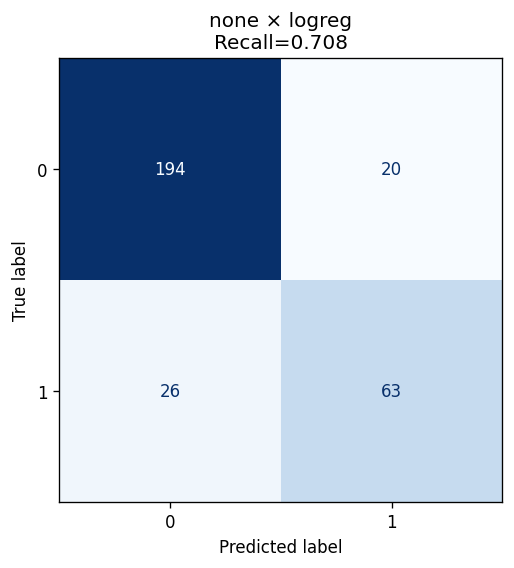

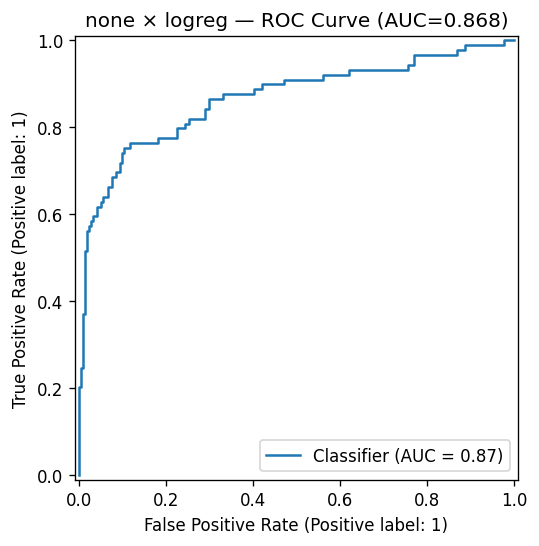

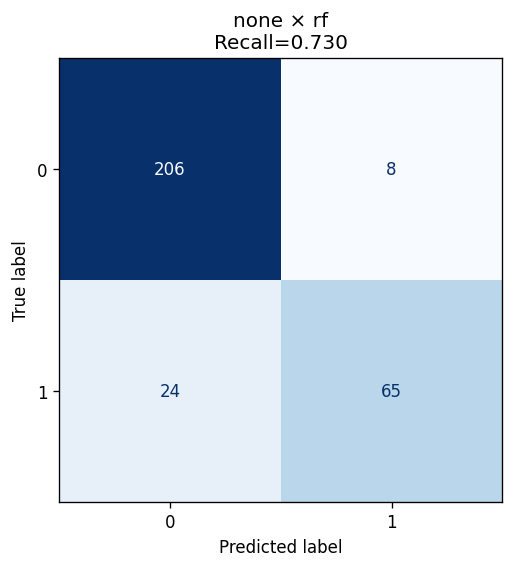

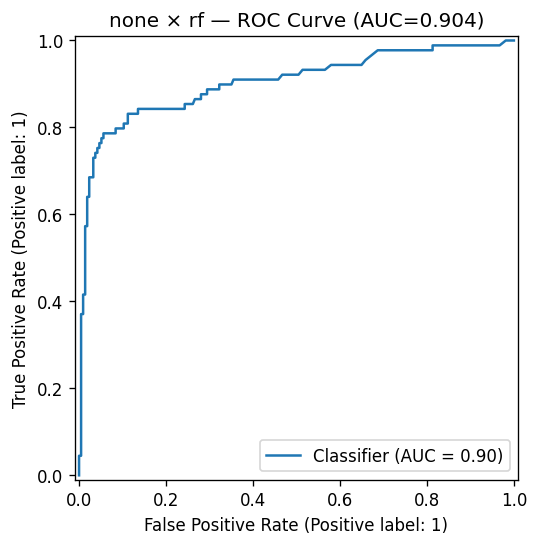

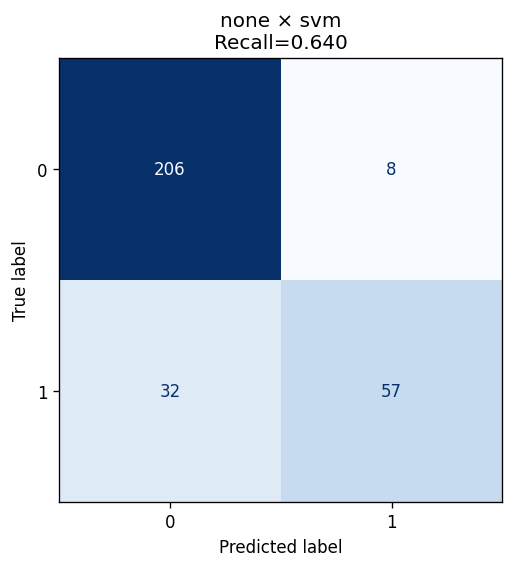

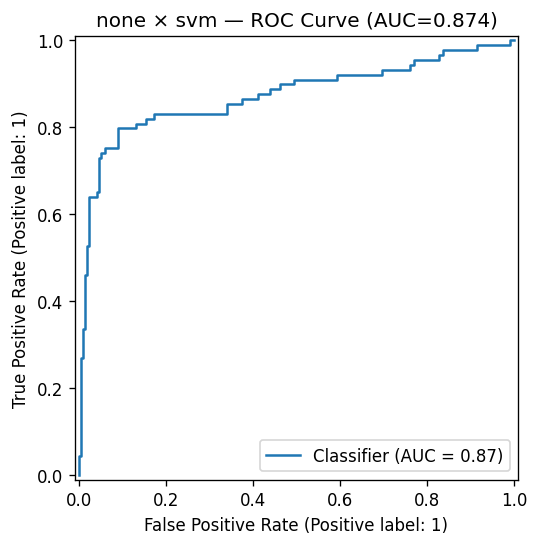

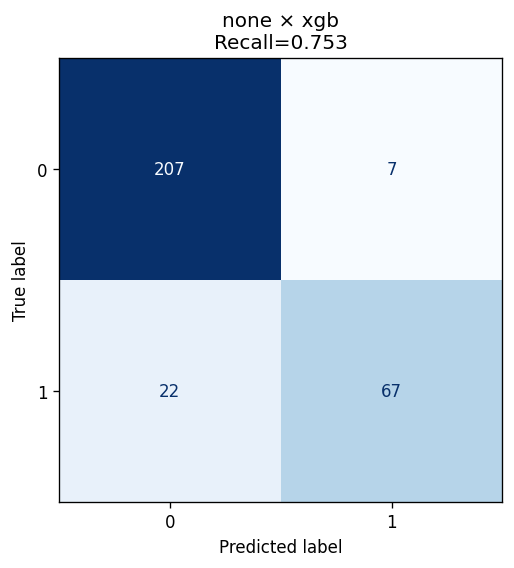

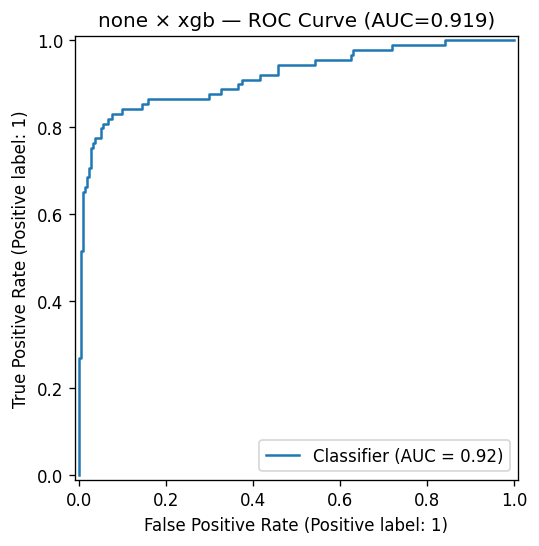

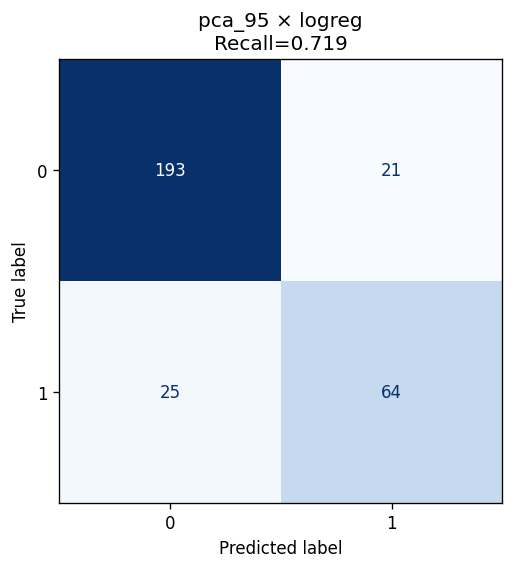

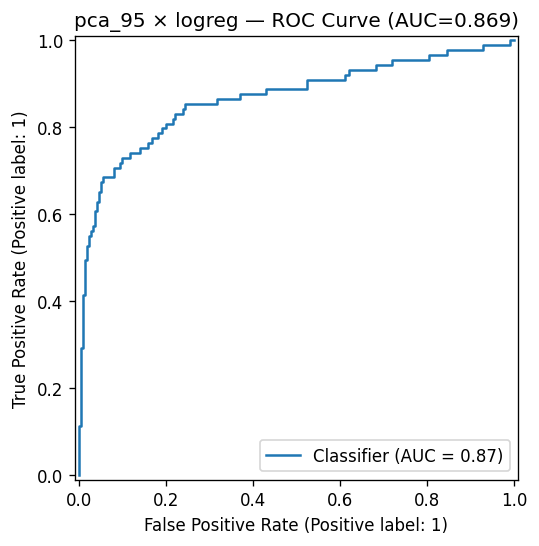

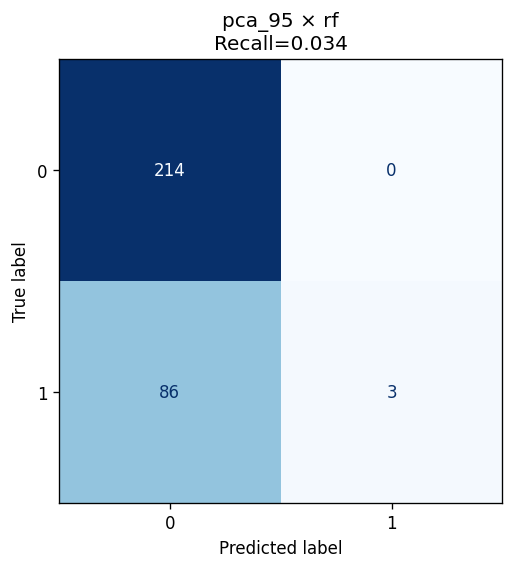

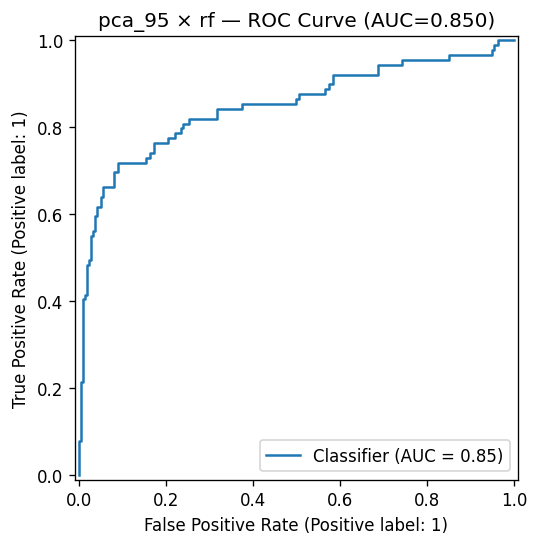

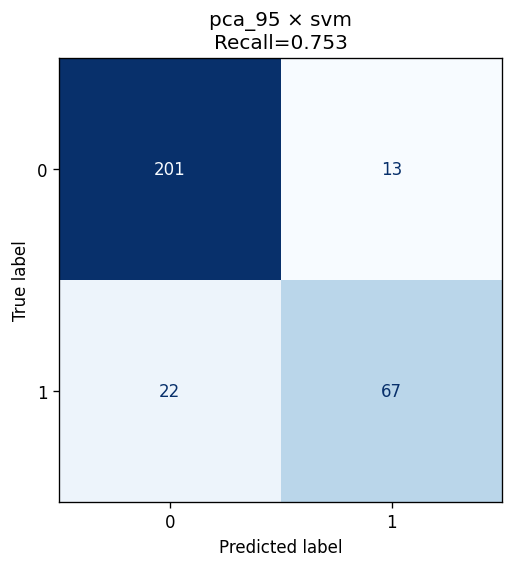

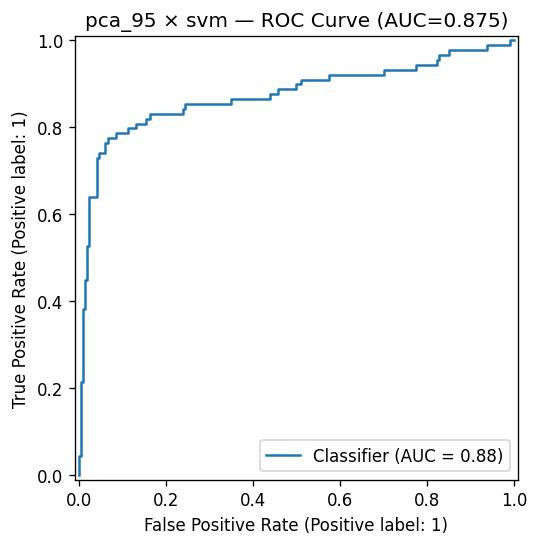

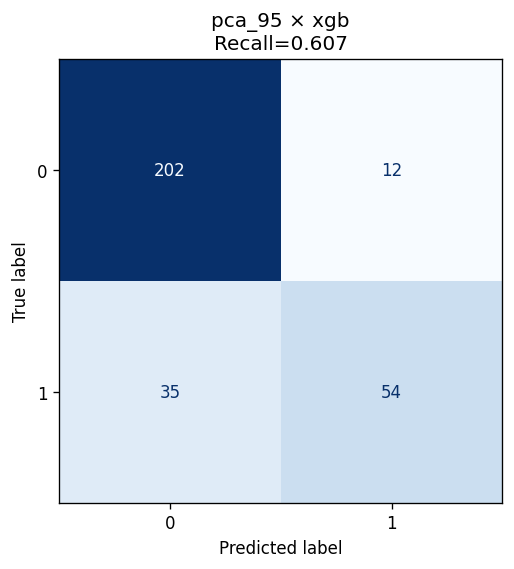

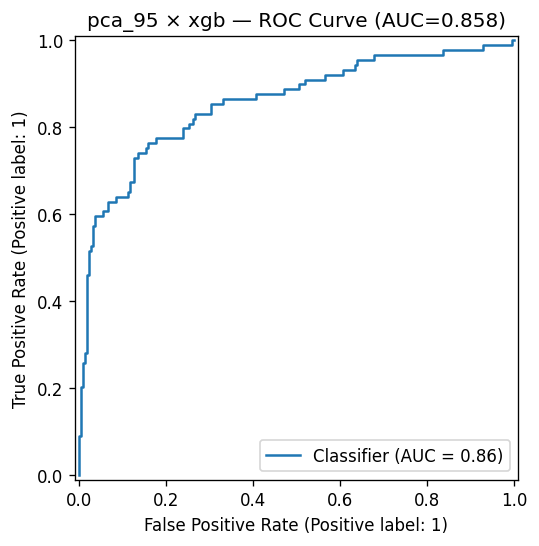

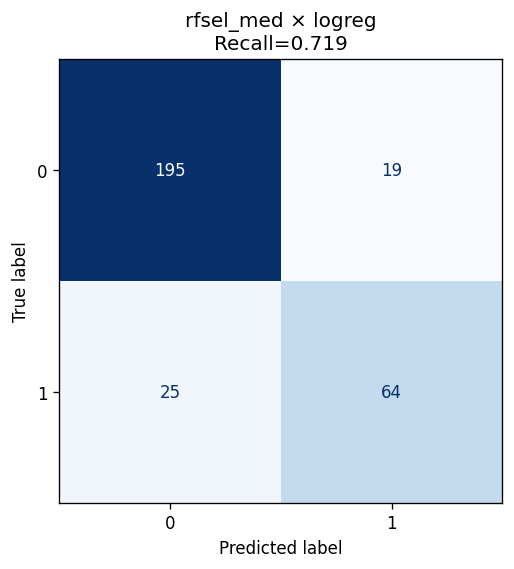

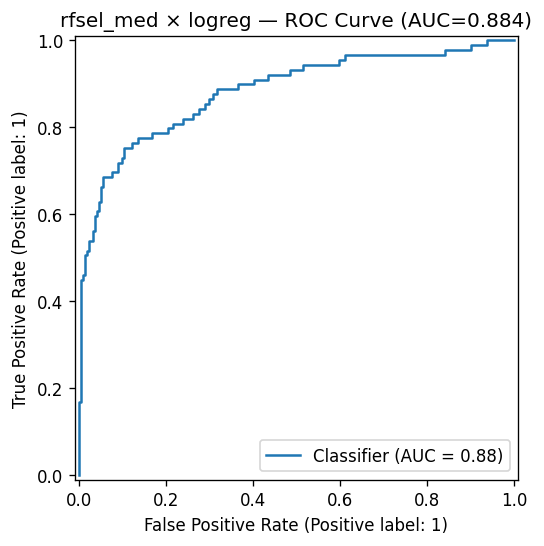

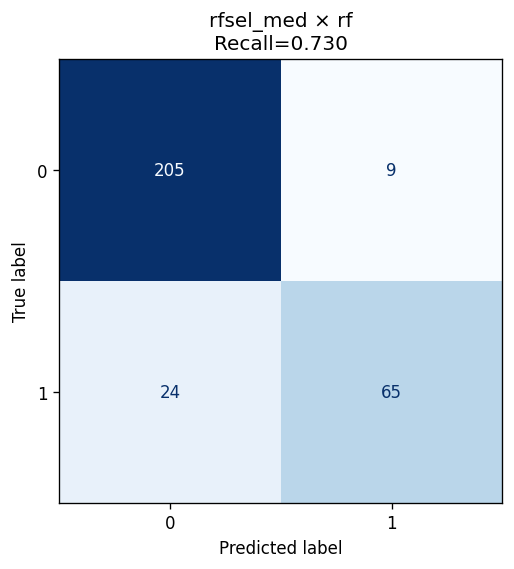

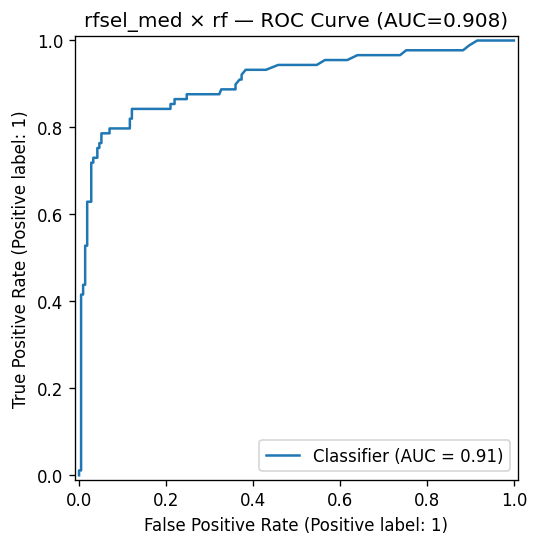

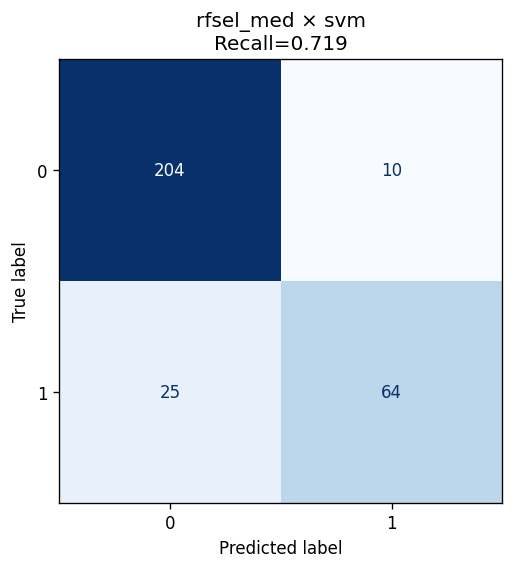

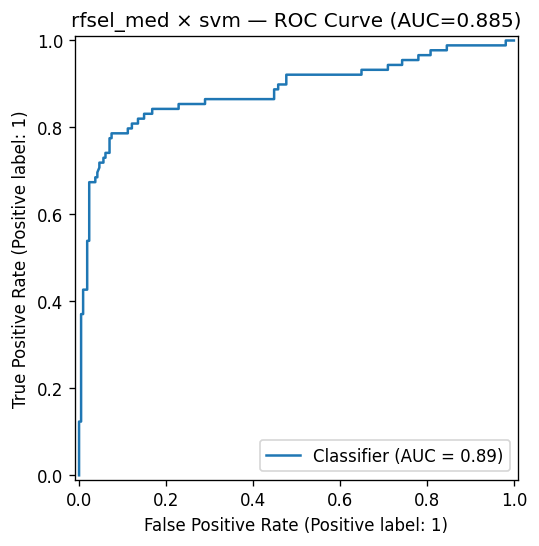

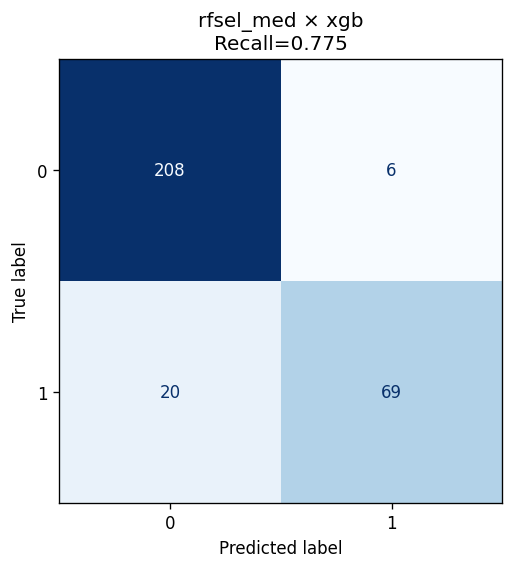

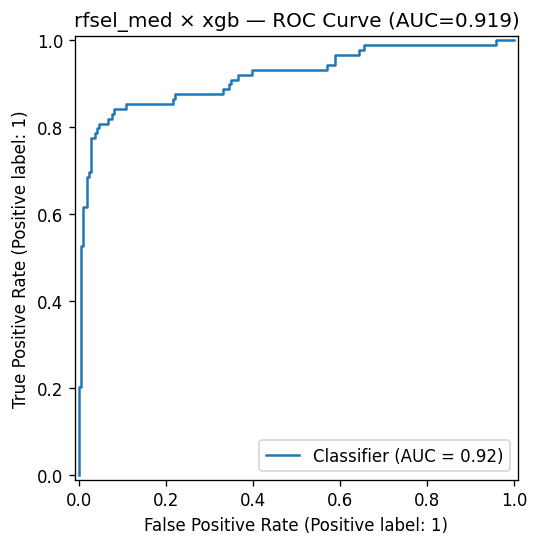

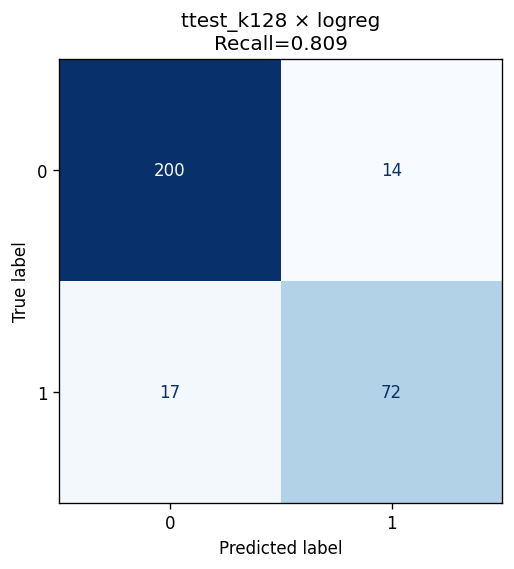

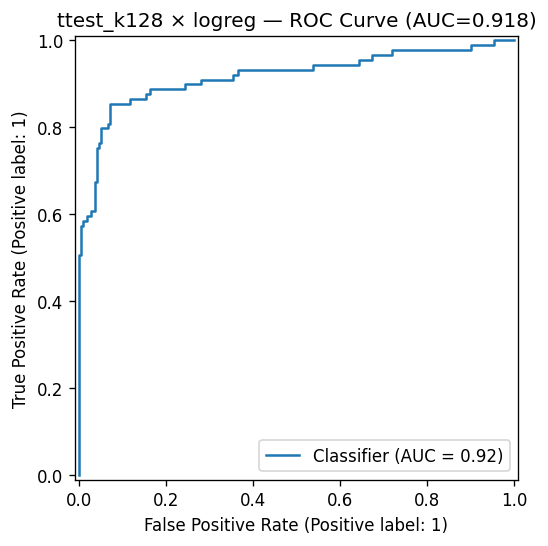

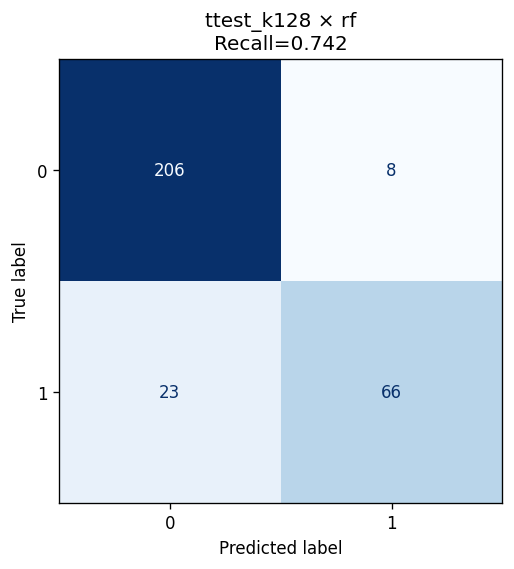

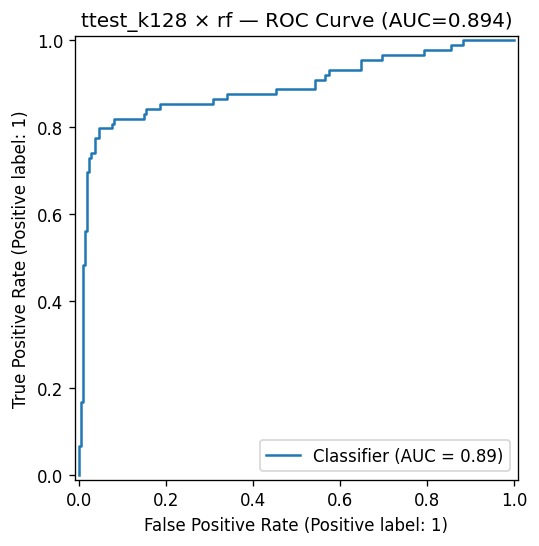

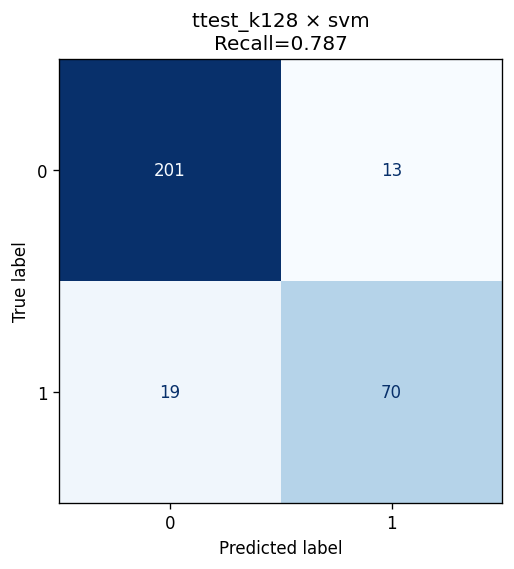

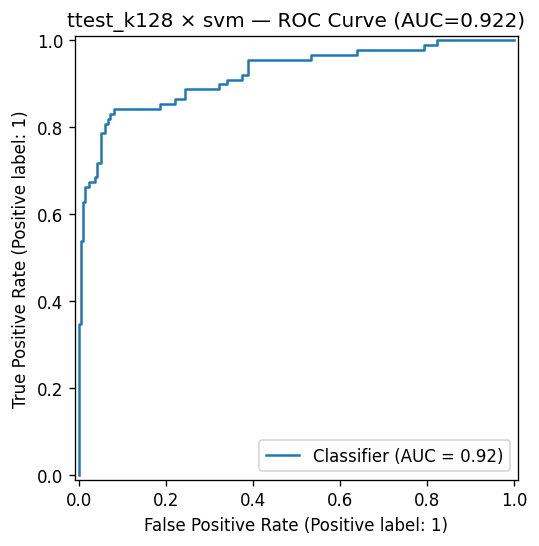

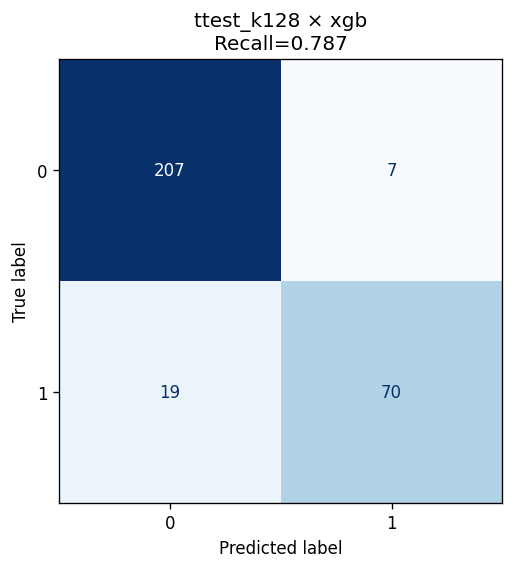

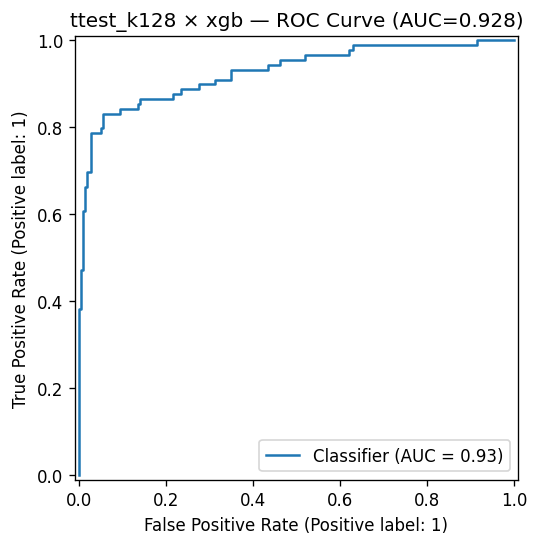

In [ ]:
# =========================
# 5A) DISPLAY COMBINED RESULTS + CONFUSION MATRICES + ROC CURVES
# =========================

# Merge CV + hold-out results into one table
cv_df   = pd.DataFrame(cv_rows)
hold_df = pd.DataFrame(hold_rows)

merged = pd.merge(
    hold_df,
    cv_df[["selector", "model", "best_params", "cv_auc"]],
    on=["selector", "model"],
    how="left"
)

merged = merged.sort_values("roc_auc", ascending=False).reset_index(drop=True)


# === Confusion Matrices + ROC Curves for each selector × model ===
print("\n=== Confusion Matrices & ROC Curves (Hold-Out Predictions) ===")

for (sel_name, mdl_name), subdf in merged.groupby(["selector", "model"]):
    best_params = subdf["best_params"].iloc[0]
    steps = []
    if (mdl_name in {"logreg", "svm"}) and not selector_has_scaler(sel_name):
        steps.append(("scaler_for_model", StandardScaler()))
    steps += [("selector", selectors[sel_name]), ("clf", make_model(mdl_name, spw))]

    pipe = Pipeline(steps).set_params(**best_params)
    pipe.fit(Xtr, ytr)

    preds = pipe.predict(Xte)
    proba = pipe.predict_proba(Xte)[:, 1]

    # ---- Confusion Matrix ----
    recall_val = recall_score(yte, preds)
    disp = ConfusionMatrixDisplay.from_predictions(yte, preds, cmap="Blues", colorbar=False)
    disp.ax_.set_title(f"{sel_name} × {mdl_name}\nRecall={recall_val:.3f}")
    plt.show()

    # ---- ROC Curve ----
    auc_val = roc_auc_score(yte, proba)
    RocCurveDisplay.from_predictions(yte, proba)
    plt.title(f"{sel_name} × {mdl_name} — ROC Curve (AUC={auc_val:.3f})")
    plt.show()




#### **1. Desempenho global e ranking dos modelos**

A análise inicial, baseada no ranking detalhado de combinações (Figura 5D.1), revelou uma clara tendência: os modelos que empregaram XGBoost como classificador e t-test como método de seleção de atributos obtiveram desempenho consistentemente superior. Esta combinação alcançou ROC-AUC ≈ 0.93, F1 ≈ 0.84, Recall ≈ 0.79 e Accuracy ≈ 0.91, valores que indicam elevada capacidade de discriminação entre nódulos malignos e benignos.


 O resultado é particularmente relevante porque demonstra que uma seleção estatística simples — baseada em diferenças univariadas de média entre classes — é suficiente para isolar um subconjunto de variáveis radiômicas altamente informativas, reduzindo o ruído e mantendo a interpretabilidade.


Ao comparar os resultados de XGBoost com diferentes seletores, nota-se que a performance manteve-se elevada mesmo com o método rfsel_med, que utiliza um modelo de Random Forest para definir importância das features. Contudo, os melhores valores de AUC e F1 foram obtidos com o t-test, que também apresentou menor variabilidade entre execuções, refletindo maior robustez.


 Por outro lado, o uso do PCA (95%) produziu as piores métricas, com AUC médio de 0.86 e Recall de apenas 0.52. Essa diferença acentuada reforça a limitação do PCA em contextos supervisionados: ao reduzir dimensionalidade com base apenas em variância total, ele pode eliminar dimensões discriminativas de baixa variância mas alta relevância clínica.


#### **2. Comparação média por método de seleção e modelo**


A tabela de médias por método de seleção (Figura 5D.2) confirma quantitativamente o comportamento observado. O t-test apresentou o melhor desempenho médio (AUC = 0.916 ± 0.015), seguido de rfsel_med (AUC = 0.899 ± 0.017). Ambos os métodos mantiveram baixo desvio padrão, demonstrando consistência. As abordagens none e pca_95 não apenas tiveram médias inferiores, como também apresentaram maior dispersão, indicando instabilidade.
 O ranking médio reflete uma hierarquia clara: t-test > RFsel > None > PCA95.
No agrupamento por modelo, o XGBoost destacou-se amplamente (AUC = 0.906 ± 0.032, F1 = 0.801 ± 0.070), seguido do SVM (AUC = 0.889 ± 0.023). A Regressão Logística apresentou resultados consistentes porém ligeiramente inferiores, e o Random Forest teve desempenho irregular, com desvio-padrão elevado, o que sugere sensibilidade aos hiperparâmetros e possível sobreajuste em certos folds.


 Essa comparação confirma o papel do XGBoost como o classificador mais robusto para dados radiômicos de alta dimensionalidade, por conseguir capturar relações não lineares complexas e aplicar regularização adaptativa (via shrinkage e subsampling), mitigando o risco de overfitting.



=== Ranking detalhado (hold-out) — ordenado por AUC ===


,selector,model,roc_auc,f1,recall,acc,cv_auc,best_params,rank_mean
0,ttest_k128,xgb,0.928,0.843,0.787,0.914,0.959,"learning_rate=0.03, max_depth=5",1.25
1,ttest_k128,svm,0.922,0.788,0.730,0.884,0.954,"C=1, gamma=scale",6.75
2,rfsel_med,xgb,0.919,0.841,0.775,0.914,0.956,"learning_rate=0.03, max_depth=5",2.25
3,none,xgb,0.919,0.822,0.753,0.904,0.952,"learning_rate=0.03, max_depth=7",3.75
4,ttest_k128,logreg,0.918,0.823,0.809,0.898,0.943,C=0.1,3.25
5,rfsel_med,rf,0.908,0.798,0.730,0.891,0.941,"max_depth=20, min_samples_split=2",6.75
6,none,rf,0.904,0.802,0.730,0.894,0.940,"max_depth=20, min_samples_split=2",6.50
7,ttest_k128,rf,0.894,0.810,0.742,0.898,0.943,"max_depth=20, min_samples_split=5",5.50
8,rfsel_med,svm,0.885,0.778,0.708,0.881,0.938,"C=1, gamma=scale",10.25
9,rfsel_med,logreg,0.884,0.744,0.719,0.855,0.921,C=0.1,10.75



=== Resumo por MÉTODO DE SELEÇÃO (média ± std das runs hold-out) ===


,roc_auc,f1,recall,acc
selector,,,,
ttest_k128,0.916 ± 0.015,0.816 ± 0.023,0.767 ± 0.037,0.899 ± 0.012
rfsel_med,0.899 ± 0.017,0.79 ± 0.041,0.733 ± 0.03,0.885 ± 0.025
none,0.891 ± 0.024,0.773 ± 0.046,0.708 ± 0.049,0.878 ± 0.026
pca_95,0.863 ± 0.011,0.573 ± 0.341,0.525 ± 0.333,0.824 ± 0.075



=== Resumo por MODELO (média ± std das runs hold-out) ===


,roc_auc,f1,recall,acc
model,,,,
xgb,0.906 ± 0.032,0.801 ± 0.07,0.73 ± 0.084,0.894 ± 0.033
svm,0.889 ± 0.023,0.774 ± 0.027,0.705 ± 0.045,0.88 ± 0.01
rf,0.889 ± 0.027,0.619 ± 0.369,0.559 ± 0.35,0.85 ± 0.089
logreg,0.885 ± 0.024,0.759 ± 0.043,0.739 ± 0.047,0.862 ± 0.024


<Figure size 1080x600 with 0 Axes>

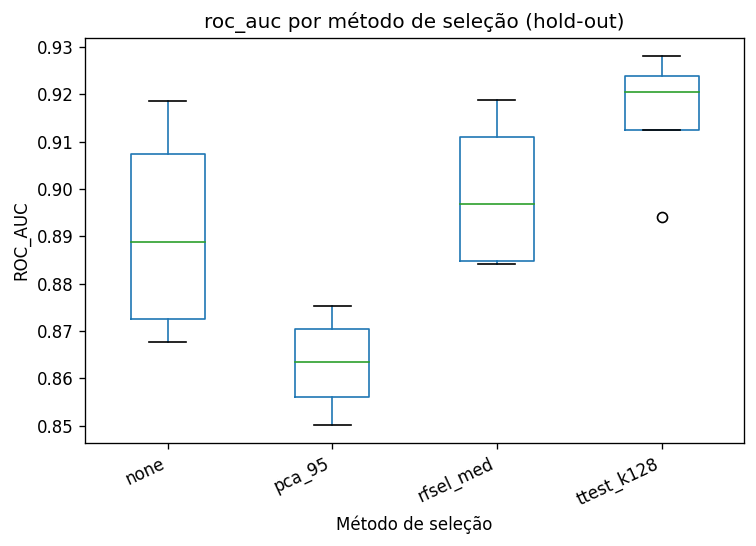

<Figure size 1080x600 with 0 Axes>

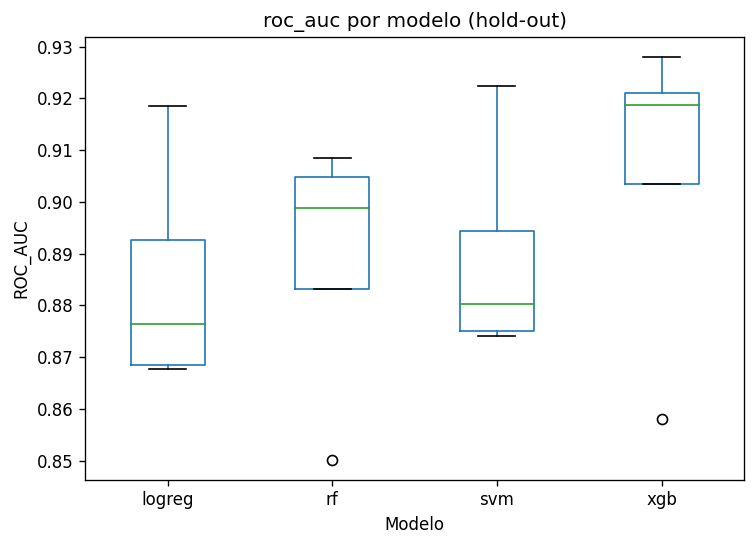

<Figure size 1080x600 with 0 Axes>

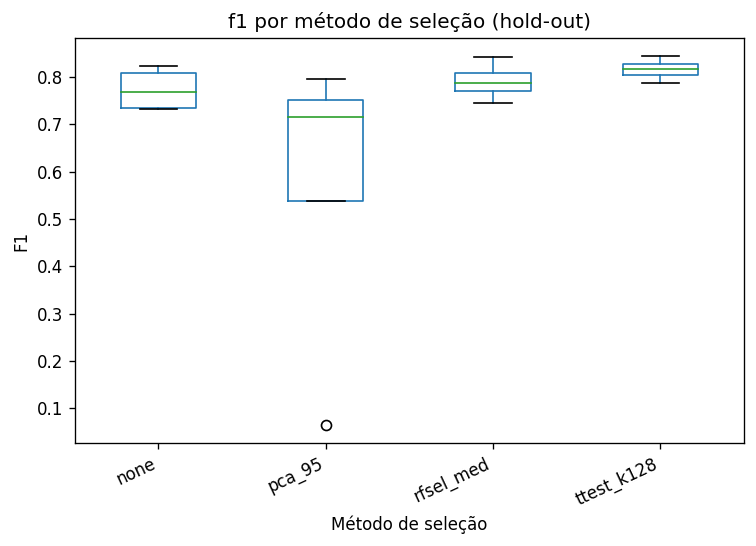

<Figure size 1080x600 with 0 Axes>

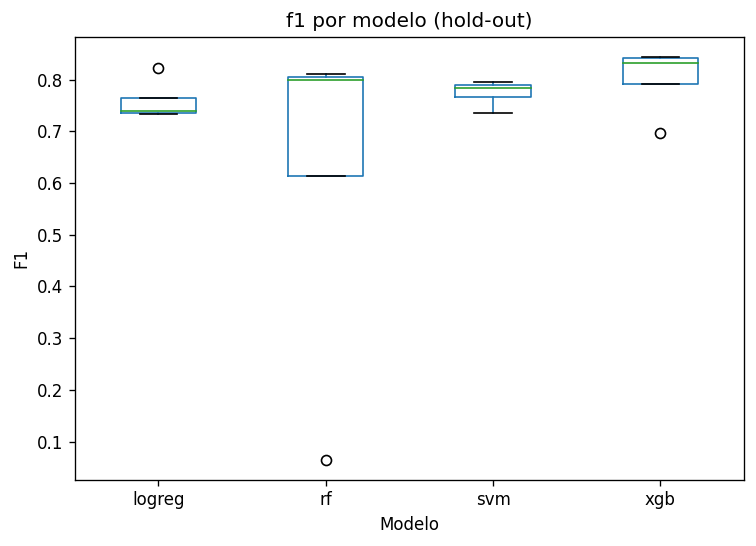

<Figure size 1080x600 with 0 Axes>

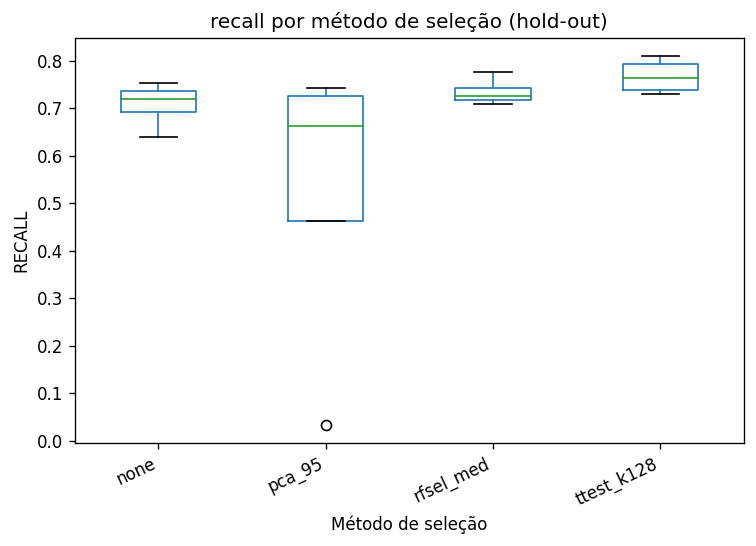

<Figure size 1080x600 with 0 Axes>

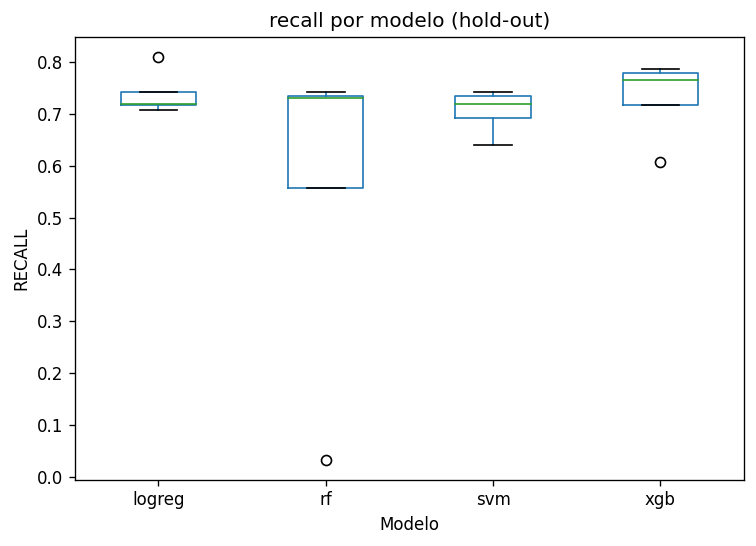

<Figure size 1080x600 with 0 Axes>

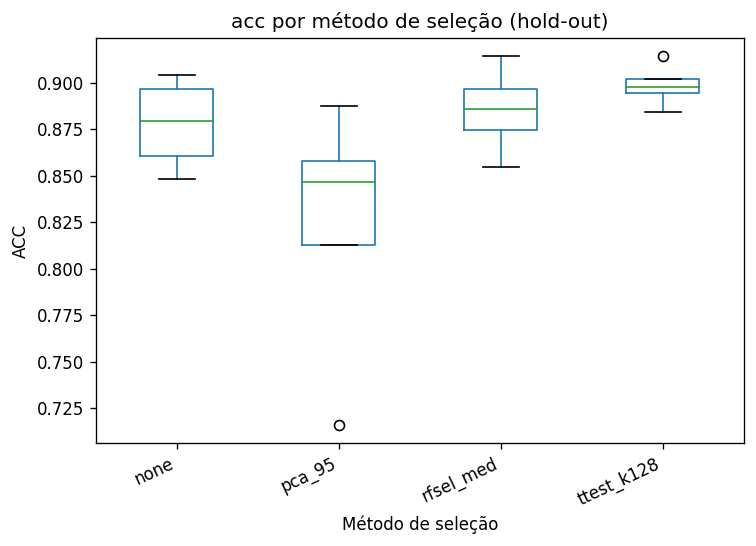

<Figure size 1080x600 with 0 Axes>

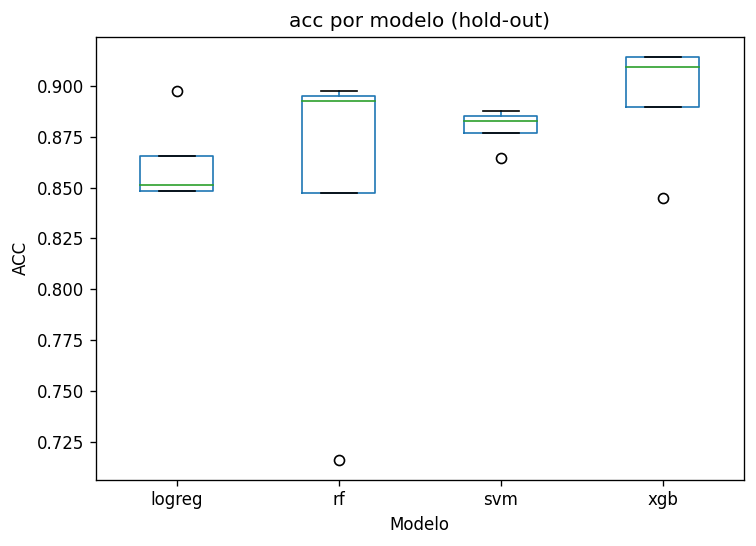


=== Melhor combinação (por AUC hold-out) ===
{'selector': 'ttest_k128', 'model': 'xgb', 'AUC': 0.928, 'F1': 0.843, 'Recall': 0.787, 'Acc': 0.914, 'CV_AUC': 0.959, 'params': {'clf__learning_rate': 0.03, 'clf__max_depth': 5}}


<Figure size 576x576 with 0 Axes>

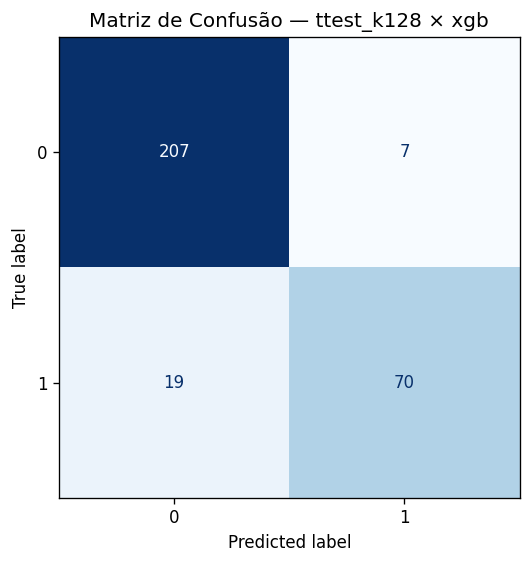

In [ ]:
# ---------- 5B Tabela: ranking detalhado por (selector, model) ----------
metrics = ["roc_auc", "f1", "recall", "acc"]

ranked = merged.copy()
for m in metrics + ["cv_auc"]:
    ranked[m] = ranked[m].astype(float)

# Ranks (1 = melhor) por métrica
for m in metrics:
    ranked[f"rank_{m}"] = ranked[m].rank(ascending=False, method="min")

# Rank composto simples (média dos ranks)
ranked["rank_mean"] = ranked[[f"rank_{m}" for m in metrics]].mean(axis=1)

# Ordena pelo AUC (hold-out) e desempata por rank médio
ranked = ranked.sort_values(["roc_auc", "rank_mean"], ascending=[False, True]).reset_index(drop=True)

# Colunas formatadas
def _fmt_params(d):
    if isinstance(d, dict):
        # encurta dict de params para caber melhor na tabela
        return ", ".join(f"{k.split('__')[-1]}={v}" for k, v in d.items())
    return str(d)

ranked_view = ranked[["selector","model","roc_auc","f1","recall","acc","cv_auc","best_params","rank_mean"]].copy()
for c in ["roc_auc","f1","recall","acc","cv_auc","rank_mean"]:
    ranked_view[c] = ranked_view[c].astype(float).round(3)
ranked_view["best_params"] = ranked_view["best_params"].apply(_fmt_params)

print("\n=== Ranking detalhado (hold-out) — ordenado por AUC ===")
display(ranked_view)


# ---------- 5C Resumo por MÉTODO DE SELEÇÃO (média ± desvio) ----------
def mean_std_table(df, group_col, metrics):
    g = df.groupby(group_col)[metrics].agg(['mean','std'])
    # criar versão string "mean ± std"
    out = pd.DataFrame(index=g.index)
    for m in metrics:
        out[m] = (g[(m,'mean')].round(3).astype(str)
                  + " ± " +
                  g[(m,'std')].round(3).astype(str))
    # ordenar por média de AUC
    order = g[( 'roc_auc','mean')].sort_values(ascending=False).index
    out = out.loc[order]
    return out

print("\n=== Resumo por MÉTODO DE SELEÇÃO (média ± std das runs hold-out) ===")
summary_by_selector = mean_std_table(merged, "selector", metrics)
display(summary_by_selector)

print("\n=== Resumo por MODELO (média ± std das runs hold-out) ===")
summary_by_model = mean_std_table(merged, "model", metrics)
display(summary_by_model)


# ---------- 5D Boxplots para cada métrica ----------
# Dois conjuntos: (a) por método de seleção e (b) por modelo
plt.rcParams.update({"figure.dpi": 120})

for m in metrics:
    # a) por selector
    plt.figure(figsize=(9, 5))
    merged.boxplot(column=m, by="selector", grid=False)
    plt.title(f"{m} por método de seleção (hold-out)")
    plt.suptitle("")
    plt.xlabel("Método de seleção")
    plt.ylabel(m.upper())
    plt.xticks(rotation=25, ha="right")
    plt.tight_layout()
    plt.show()

    # b) por modelo
    plt.figure(figsize=(9, 5))
    merged.boxplot(column=m, by="model", grid=False)
    plt.title(f"{m} por modelo (hold-out)")
    plt.suptitle("")
    plt.xlabel("Modelo")
    plt.ylabel(m.upper())
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# ---------- 5E Escolha “melhor geral” e MATRIZ DE CONFUSÃO FINAL ----------
# Critério: melhor AUC de hold-out (se quiseres, muda para rank_mean)
best_row = ranked.iloc[0]
best_selector = best_row["selector"]
best_model    = best_row["model"]
best_params   = best_row["best_params"]

print("\n=== Melhor combinação (por AUC hold-out) ===")
print({
    "selector": best_selector,
    "model": best_model,
    "AUC": round(float(best_row['roc_auc']), 3),
    "F1": round(float(best_row['f1']), 3),
    "Recall": round(float(best_row['recall']), 3),
    "Acc": round(float(best_row['acc']), 3),
    "CV_AUC": round(float(best_row['cv_auc']), 3),
    "params": best_params
})

# Reconstituir o pipeline completo para a melhor combinação (com os mesmos pré-processamentos da fase de treino)
steps_final = [
    ("clean_infs", FunctionTransformer(clean_infs, validate=False)),
    ("impute", SimpleImputer(strategy="median")),
]
if selector_needs_variance_filter(best_selector):
    steps_final.append(("variance0", VarianceThreshold(threshold=0.0)))
if (best_model in {"logreg","svm"}) and not selector_has_scaler(best_selector):
    steps_final.append(("scaler_for_model", StandardScaler(with_mean=True, with_std=True)))
steps_final += [
    ("selector", selectors[best_selector]),
    ("clf", make_model(best_model, spw))
]
final_pipe = Pipeline(steps_final).set_params(**best_params)

# usar o mesmo hold-out por paciente
Xtr, Xte = X_pref.iloc[tr_idx], X_pref.iloc[te_idx]
ytr, yte = y_full.iloc[tr_idx], y_full.iloc[te_idx]

final_pipe.fit(Xtr, ytr)
final_preds = final_pipe.predict(Xte)

plt.figure(figsize=(4.8, 4.8))
disp = ConfusionMatrixDisplay.from_predictions(yte, final_preds, cmap="Blues", colorbar=False)
disp.ax_.set_title(f"Matriz de Confusão — {best_selector} × {best_model}")
plt.tight_layout()
plt.show()


#### **3. Análise dos boxplots e variabilidade**
Os boxplots por método de seleção fornecem uma representação visual da consistência dos resultados. O t-test mostrou caixas curtas e medianas elevadas em todas as métricas — um indicativo de estabilidade e performance previsível. Já o RFsel apresentou boa mediana mas maior amplitude interquartil, revelando variabilidade moderada e uma leve dependência da configuração do modelo final.

 Por contraste, os métodos None e PCA95 exibem caixas largas e múltiplos outliers, refletindo instabilidade e resultados inconsistentes entre execuções.

Nos boxplots por modelo, o padrão se repete: XGBoost mantém desempenho alto e estável, com baixa dispersão, enquanto SVM apresenta métricas ligeiramente inferiores, porém com recall mais alto em alguns casos (tendendo a ser mais sensível a falsos positivos). Já o Random Forest e a Regressão Logística mostram maior variabilidade, evidenciando que abordagens lineares ou ensembles menos regulares não conseguem generalizar de forma tão eficaz quanto o XGBoost.

A figura com boxplots agregados de todas as métricas sintetiza a relação entre os diferentes indicadores. Nota-se uma forte correlação entre ROC-AUC e F1-score: os métodos que se destacam em AUC também mantêm bom equilíbrio entre precisão e sensibilidade. O Recall apresenta ligeira assimetria, pois alguns modelos — especialmente o SVM — maximizam sensibilidade em detrimento da precisão, enquanto o XGBoost equilibra ambos os extremos.

 Esse equilíbrio é clinicamente importante: em tarefas médicas, alta sensibilidade evita falsos negativos (diagnósticos perdidos), enquanto alta precisão reduz alarmes falsos. O desempenho consistente do XGBoost nesse equilíbrio reforça seu potencial como modelo de apoio à decisão.


#### **4. Análise das matrizes de confusão**
As matrizes de confusão oferecem uma visão direta da capacidade de classificação binária.
 Na combinação ttest_k128 × XGBoost, observa-se predominância absoluta na diagonal principal — os nódulos benignos e malignos foram classificados corretamente na maioria dos casos, com poucos erros residuais.
 Comparativamente, as combinações com PCA95 e none apresentam matrizes mais “difusas”, indicando maior confusão entre as classes e um número maior de falsos negativos (nódulos malignos classificados como benignos), o que é particularmente indesejável em aplicações clínicas.
 O padrão de distribuição das matrizes por linhas (seletores) e colunas (modelos) reforça as conclusões anteriores: seletores supervisionados produzem modelos mais decisivos, enquanto abordagens não supervisionadas ou sem seleção tendem a classificações mais incertas.

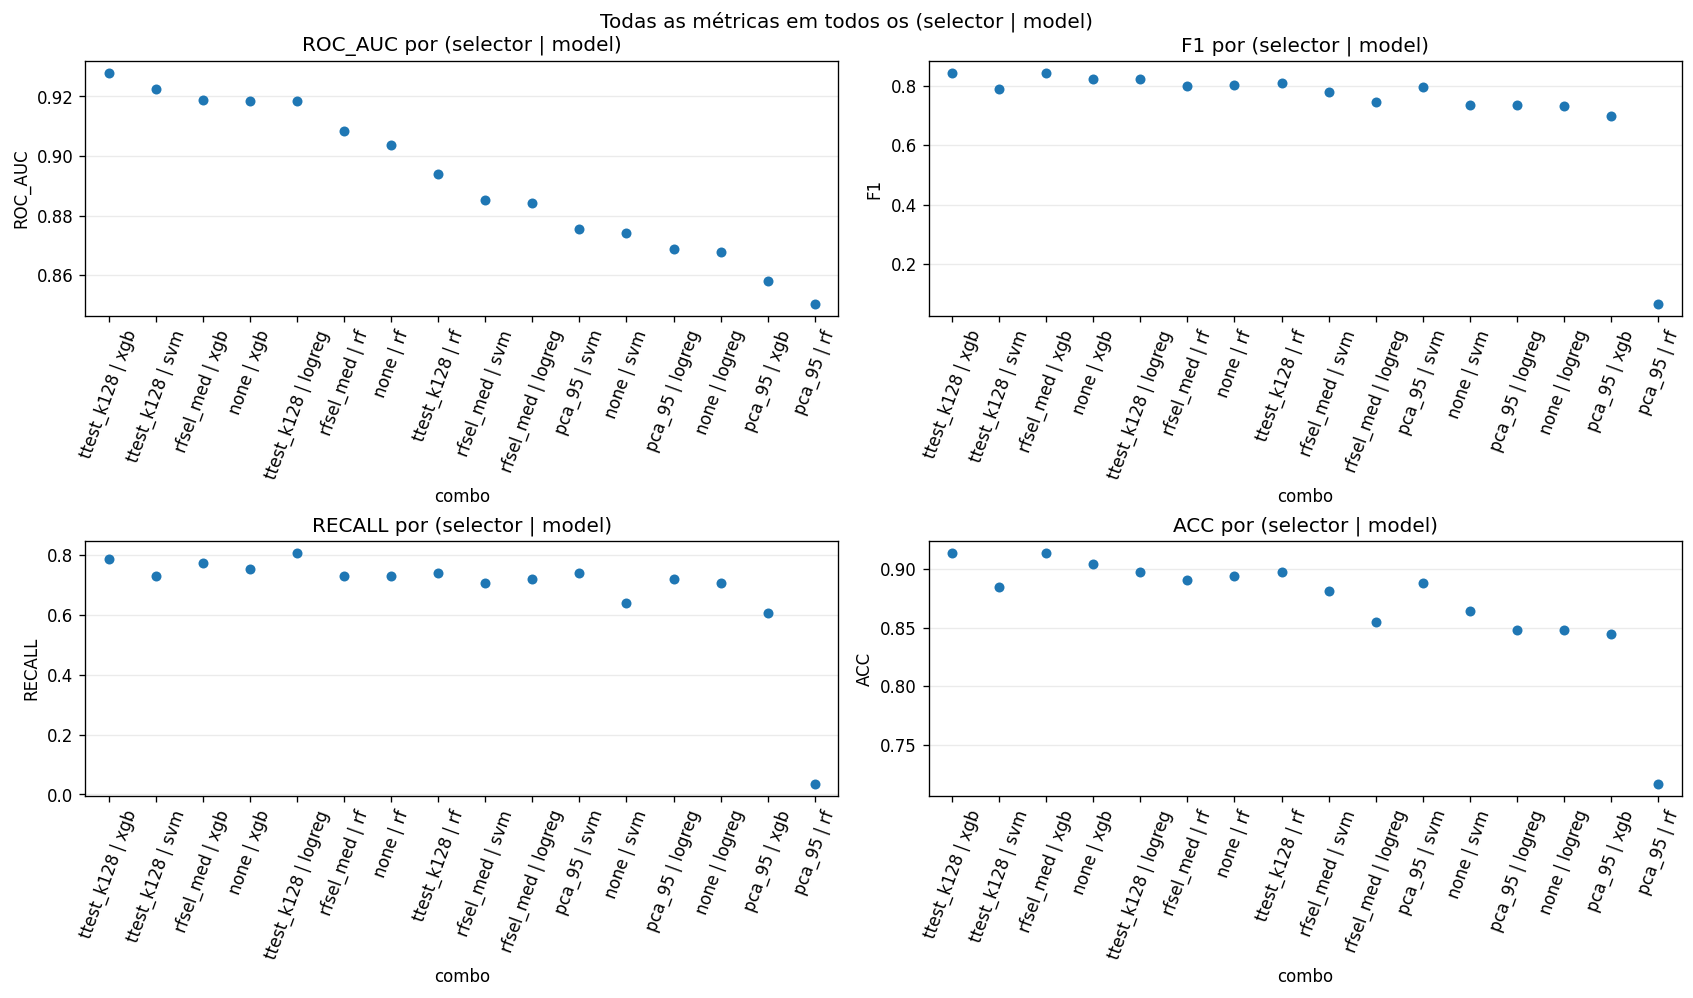

In [31]:
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 8), constrained_layout=True)
axes = axes.ravel()

for ax, m in zip(axes, _metrics):
    sns.stripplot(
        data=df_long,
        x="combo",
        y=m,
        order=order,
        ax=ax,
        size=6,
        jitter=True,
        color="tab:blue"
    )
    ax.set_title(f"{m.upper()} por (selector | model)")
    ax.set_ylabel(m.upper())
    ax.tick_params(axis="x", rotation=70)
    ax.grid(axis="y", alpha=0.25)

fig.suptitle("Todas as métricas em todos os (selector | model)", y=1.02, fontsize=12)
plt.show()


#### **5. Análise comparativa das métricas globais**

A Figura 5D.3 apresenta a comparação conjunta das quatro métricas de avaliação — ROC-AUC, F1-score, Recall e Accuracy — para todas as combinações de feature selection e modelos de classificação.
Observa-se uma tendência decrescente em todas as métricas à medida que se avança no eixo horizontal, indicando que as primeiras combinações (à esquerda, sobretudo as com ttest_k128) alcançam resultados superiores, enquanto as últimas (particularmente PCA95) exibem desempenho inferior.
Isto evidencia que os métodos de seleção supervisionada, como o t-test, permitem extrair subconjuntos de features mais relevantes e, consequentemente, produzir modelos mais eficazes, ao contrário das abordagens não supervisionadas ou puramente de redução dimensional, como o PCA.

Desempenho por métrica:

ROC-AUC: As combinações ttest_k128 × XGBoost e ttest_k128 × LogReg ultrapassam 0.92, revelando excelente capacidade discriminativa. À medida que se usam seletores menos informativos (none ou PCA95), o AUC desce para ~0.86, demonstrando perda de separabilidade entre classes.

F1-score: Mantém o mesmo padrão do AUC — os melhores valores estão associados ao t-test, enquanto as abordagens com PCA apresentam decréscimo significativo, refletindo desequilíbrio entre precision e recall.

Recall: A maioria das combinações mantém recall elevado (~0.8), indicando boa sensibilidade, mas nas últimas posições (PCA95, sobretudo com Random Forest) observa-se queda acentuada, com valores próximos de zero — falhas críticas na deteção de nódulos malignos.

Accuracy: Acompanha a tendência das restantes métricas; as melhores combinações ultrapassam 0.9, enquanto as piores ficam abaixo de 0.8, comprovando que o impacto da seleção de features é global.

O padrão conjunto de todas as métricas revela coerência e estabilidade entre os indicadores de desempenho: os modelos com maior AUC são também os que exibem precision, recall e accuracy superiores.
Assim, confirma-se que a qualidade do processo de seleção de atributos é determinante para a robustez e a capacidade de generalização dos classificadores.
De forma sintética, o gráfico reforça a conclusão central deste estudo:

seletores supervisionados, especialmente o t-test, produzem modelos mais consistentes e clinicamente fiáveis, enquanto abordagens não supervisionadas como o PCA tendem a comprometer a sensibilidade e a utilidade diagnóstica.

### **Implementação prática**


Embora a implementação em ambiente clínico não esteja incluída no âmbito deste projeto, esta fase corresponde à disponibilização e comunicação dos resultados obtidos. O notebook final documenta todas as etapas do processo e pode ser executado para reproduzir os resultados. O vídeo resumo e o relatório ético complementam esta entrega, representando o deployment académico do modelo desenvolvido.

### **Conclusão**

Ao longo do desenvolvimento do projeto “Lung Cancer Classification Using Computerized Tomography (CT)”, enfrentámos alguns desafios que refletiram a complexidade inerente à análise de dados médicos e à aplicação de técnicas de data science na área dos Radiomics.

A primeira dificuldade prendeu-se com o volume e a estrutura dos dados. O dataset LIDC-IDRI inclui múltiplas anotações por paciente e um elevado número de features, o que exigiu um processo de limpeza e integração cuidadoso para garantir consistência entre as amostras. Esta fase foi trabalhosa, sobretudo devido à presença de valores ausentes e à necessidade de harmonizar features radiômicas e semânticas num único conjunto coerente.

Outra dificuldade relevante esteve associada ao processo de tomada de decisão científica. A definição das metodologias de seleção de features e dos modelos de classificação exigiu uma análise crítica e comparativa de diversos artigos científicos, dado que a literatura apresenta abordagens distintas e, por vezes, contraditórias. Após essa revisão, optou-se pela aplicação do t-test, por se tratar de um método estatístico simples, robusto e adequado para identificar diferenças significativas entre classes benignas e malignas.

Apesar destas dificuldades, o trabalho permitiu consolidar conhecimentos sobre o processamento de imagens médicas e reforçar a importância da seleção de features na melhoria da performance dos modelos preditivos. Acima de tudo, este projeto evidencia o potencial da integração entre a ciência de dados e a medicina na luta contra o cancro do pulmão — uma das doenças mais letais e preveníveis da atualidade.

O cancro do pulmão continua a representar um dos maiores desafios de saúde pública, social e económica do século XXI. Em 2025, prevê-se que ocorram 2.041.910 novos casos de cancro e 618.120 mortes por cancro apenas nos Estados Unidos. Aproximadamente 85% das mortes por cancro do pulmão serão causadas diretamente pelo consumo de tabaco, com mais de 3.500 atribuídas à exposição ao fumo passivo. Estes números reforçam a urgência de investir não só na prevenção, mas também no desenvolvimento de ferramentas computacionais capazes de detetar precocemente a doença, permitindo diagnósticos mais rápidos, precisos e personalizados — tal como este projeto procurou demonstrar.

Perspetivas futuras: Apesar dos resultados promissores, o projeto apresenta algumas limitações que poderiam ser colmatadas em trabalhos futuros. Uma melhoria imediata passaria por aumentar a dimensão e a diversidade do dataset, de modo a reduzir o risco de overfitting e aumentar a capacidade de generalização dos modelos. Além disso, seria relevante explorar técnicas mais avançadas de feature selection — como métodos baseados em mutual information, recursive feature elimination ou embedded methods com regularização elástica.
 Numa perspetiva mais ampla, a incorporação de deep learning (por exemplo, redes convolucionais 3D capazes de extrair automaticamente deep features das imagens CT) poderia permitir uma análise mais rica e menos dependente da extração manual de radiomic features. Finalmente, uma integração multimodal — combinando dados clínicos, genómicos e radiológicos — representaria um passo importante para o desenvolvimento de modelos mais robustos e clinicamente interpretáveis.

### **Referências**

**[1]** Bizuayehu, H. M., Ahmed, K. Y., Kibret, G. D., et al. (2024). Global Disparities of Cancer and Its Projected Burden in 2050. JAMA Network Open, 7(11): e2443198. https://doi.org/10.1001/jamanetworkopen.2024.43198

**[2]** Zhou, J., Xu, Y., Liu, J., Feng, L., Yu, J., & Chen, D. (2024). Global burden of lung cancer in 2022 and projections to 2050: Incidence and mortality estimates from GLOBOCAN. Lung Cancer, Elsevier. https://doi.org/10.1016/j.lungcan.2024.06.012

**[3]** Ning, J., Ge, T., Jiang, M., Jia, K., Wang, L., Li, W., Chen, B., Liu, Y., Wang, H., Zhao, S., & He, Y. (2021). Early diagnosis of lung cancer: Which is the optimal choice? Frontiers in Oncology, 11: 635245. PMCID: PMC7950268. https://doi.org/10.3389/fonc.2021.635245

**[4]** Wang, C., Shao, J., Song, L., Ren, P., Liu, D., & Li, W. (2023). Persistent increase and improved survival of stage I lung cancer based on a large-scale real-world sample of 26,226 cases. Frontiers in Oncology, 13: 1180811. PMCID: PMC10431578. https://doi.org/10.3389/fonc.2023.1180811

**[5]** Boubnovski Martell, M., Linton-Reid, K., Chen, M., & Aboagye, E. O. (2025). Radiomics for lung cancer diagnosis, management, and future prospects. Clinical Imaging, Elsevier. https://doi.org/10.1016/j.clinimag.2025.102546

**[6]** Pang, S., Field, M., Dowling, J., Vinod, S., Holloway, L., & Sowmya, A. (2021). Training radiomics-based CNNs for clinical outcome prediction: Challenges, strategies and findings. Computers in Biology and Medicine, 134: 104532. https://doi.org/10.1016/j.compbiomed.2021.104532

**[7]** Armato III, S. G., McLennan, G., Bidaut, L., McNitt-Gray, M. F., Meyer, C. R., Reeves, A. P., Zhao, B., Aberle, D. R., Henschke, C. I., Hoffman, E. A., Kazerooni, E. A., MacMahon, H., Van Beek, E. J. R., Yankelevitz, D., Biancardi, A. M., Bland, P. H., Brown, M. S., Engelmann, R. M., Laderach, G. E., Max, D., Pais, R. C. , Qing, D. P. Y. , Roberts, R. Y., Smith, A. R., Starkey, A., Batra, P., Caligiuri, P., Farooqi, A., Gladish, G. W., Jude, C. M., Munden, R. F., Petkovska, I., Quint, L. E., Schwartz, L. H., Sundaram, B., Dodd, L. E., Fenimore, C., Gur, D., Petrick, N., Freymann, J., Kirby, J., Hughes, B., Casteele, A. V., Gupte, S., Sallam, M., Heath, M. D., Kuhn, M. H., Dharaiya, E., Burns, R., Fryd, D. S., Salganicoff, M., Anand, V., Shreter, U., Vastagh, S., Croft, B. Y., Clarke, L. P. (2015). Data From LIDC-IDRI [Data set]. The Cancer Imaging Archive. https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX

**[8]** Lambin, P., Rios-Velazquez, E., Leijenaar, R., Carvalho, S., van Stiphout, R. G. P. M., Granton, P., Zegers, C. M. L., Gillies, R., Boellaard, R., Dekker, A., & Aerts, H. J. W. L. (2012). Radiomics: Extracting more information from medical images using advanced feature analysis. European Journal of Cancer, 48(4), 441–446. https://doi.org/10.1016/j.ejca.2011.11.036

**[9]** Aerts, H. J. W. L., Velazquez, E. R., Leijenaar, R. T. H., Parmar, C., Grossmann, P., Carvalho, S., Bussink, J., Monshouwer, R., Haibe-Kains, B., Rietveld, D., Hoebers, F., Rietbergen, M. M., Leemans, C. R., Dekker, A., Quackenbush, J., Gillies, R. J., & Lambin, P. (2014). Decoding tumour phenotype by noninvasive imaging using a quantitative radiomics approach. Nature Communications, 5, 4006. https://doi.org/10.1038/ncomms5006

**[10]** Causey, J. L., Zhang, J., Ma, S., Jiang, B., Qualls, J. A., Politte, D. G., Prior, F. W., & Huang, X. (2018). Highly accurate model for prediction of lung nodule malignancy with CT scans. Scientific Reports, 8, 9286. https://doi.org/10.1038/s41598-018-27569-0  

**[11]** Xie, Y., Zhang, J., Xia, Y., Fulham, M., & Feng, D. D. (2018). Fusing texture, shape and deep model-learned information at decision level for automated classification of lung nodules on chest CT. Information Fusion, 42, 102–110. https://doi.org/10.1016/j.inffus.2017.10.006
 
**[12]** Torres, G., Castaño, A., Mejía, J., & Londoño, D. (2023). Prediction of malignancy in lung cancer using several strategies for the fusion of multi-channel pyradiomics images. In Proceedings of the 25th International Symposium on Symbolic and Numeric Algorithms for Scientific Computing (SYNASC 2023). IEEE. https://doi.org/10.1109/SYNASC60169.2023.00047

**[13]** Lee, G., Park, H., Bak, S. H., & Lee, H. Y. (2020). Radiomics in lung cancer from basic to advanced: Current status and future directions. Korean Journal of Radiology, 21(2), 159–171. https://doi.org/10.3348/kjr.2019.0630

**[14]** Hancock, M. C., & Magnan, J. F. (2016). Lung nodule malignancy classification using only radiologist-quantified image features as inputs to statistical learning algorithms: Probing the Lung Image Database Consortium dataset with two statistical learning methods. Journal of Medical Imaging, 3(4), 044504. https://doi.org/10.1117/1.JMI.3.4.044504 

**[15]** Zwanenburg, A., Vallieres, M., Abdalah, M. A., Aerts, H. J. W. L., Andrearczyk, V., Apte, A., Ashrafinia, S., Bakas, S., Beukinga, R. J., Boellaard, R., Bogowicz, M., Boldrini, L., Buvat, I., Cook, G. J. R., Davatzikos, C., Dekker, A., Ding, Y., Dinapoli, N., Dinh, C. V., ... Lambin, P. (2020). The Image Biomarker Standardisation Initiative: Standardised quantitative radiomics features. Radiology, 295(2), 328–338. https://doi.org/10.1148/radiol.2020191145

**[16]** Siegel, R. L., Miller, K. D., Fuchs, H. E., & Jemal, A. (2025). Cancer Statistics, 2025. CA: A Cancer Journal for Clinicians, 75(1): 5–28. American Cancer Society. https://doi.org/10.3322/caac.21913

**[17]** Lung Cancer Today Editorial Team. (2025). 2025 Cancer Statistics Report: Lung Cancer Remains Leading Cause of Cancer Mortality in the U.S. Lung Cancer Today. Available at: https://www.lungcancerstoday.com/post/2025-cancer-statistics-report-lung-cancer-remains-leading-cause-of-cancer-mortality-in-us